In [ ]:
!pip install yfinance pandas numpy arch scikit-learn matplotlib seaborn ta tensorflow

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 48.9 MB/s eta 0:00:00
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=f9497df945672e3be643d32f442636221e87f09ea7dcad20c60cce91cb634334
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


First few rows of the dataset:
Price         Adj Close        Close         High          Low         Open  \
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC        ^GSPC   
Date                                                                          
2010-01-04  1132.989990  1132.989990  1133.869995  1116.560059  1116.560059   
2010-01-05  1136.520020  1136.520020  1136.630005  1129.660034  1132.660034   
2010-01-06  1137.140015  1137.140015  1139.189941  1133.949951  1135.709961   
2010-01-07  1141.689941  1141.689941  1142.459961  1131.319946  1136.270020   
2010-01-08  1144.979980  1144.979980  1145.390015  1136.219971  1140.520020   

Price           Volume        VIX  
Ticker           ^GSPC       ^VIX  
Date                               
2010-01-04  3991400000  20.040001  
2010-01-05  2491020000  19.350000  
2010-01-06  4972660000  19.160000  
2010-01-07  5270680000  19.059999  
2010-01-08  4389590000  18.129999  

Missing values in the dataset:
Price      Ticke

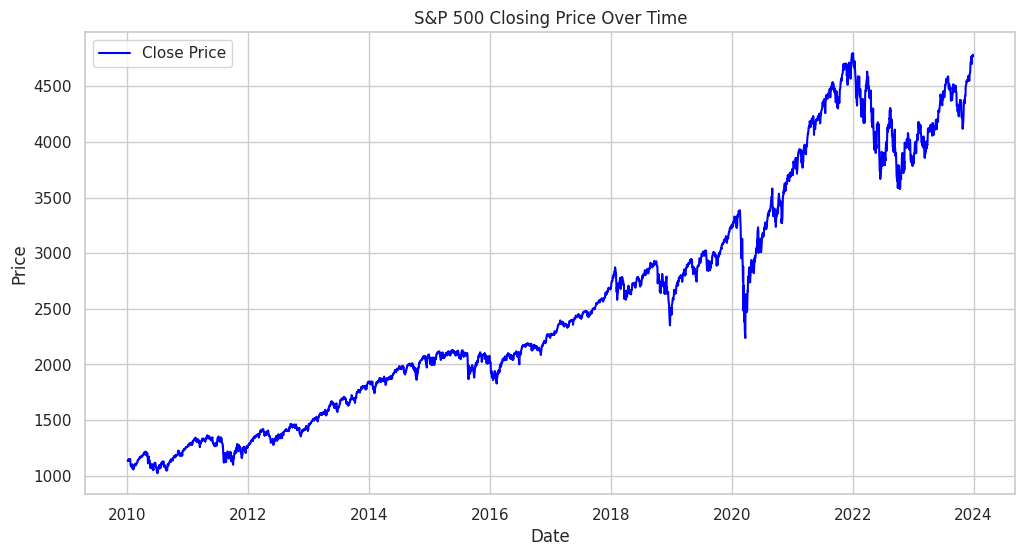

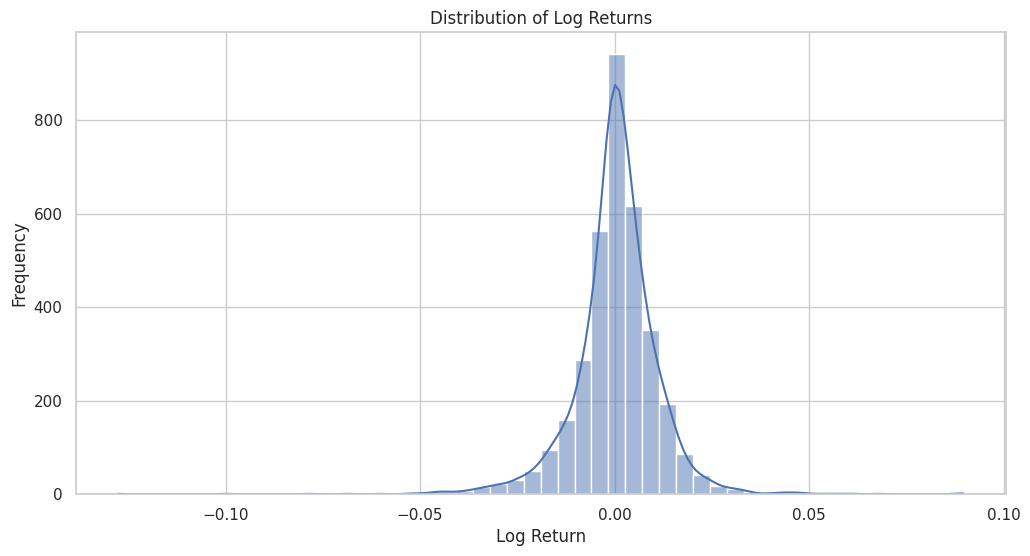

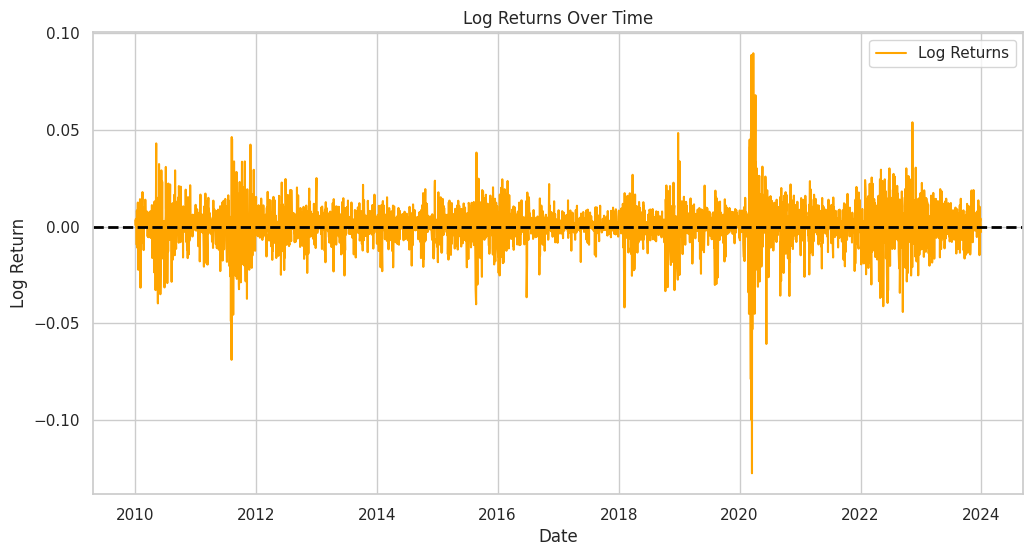

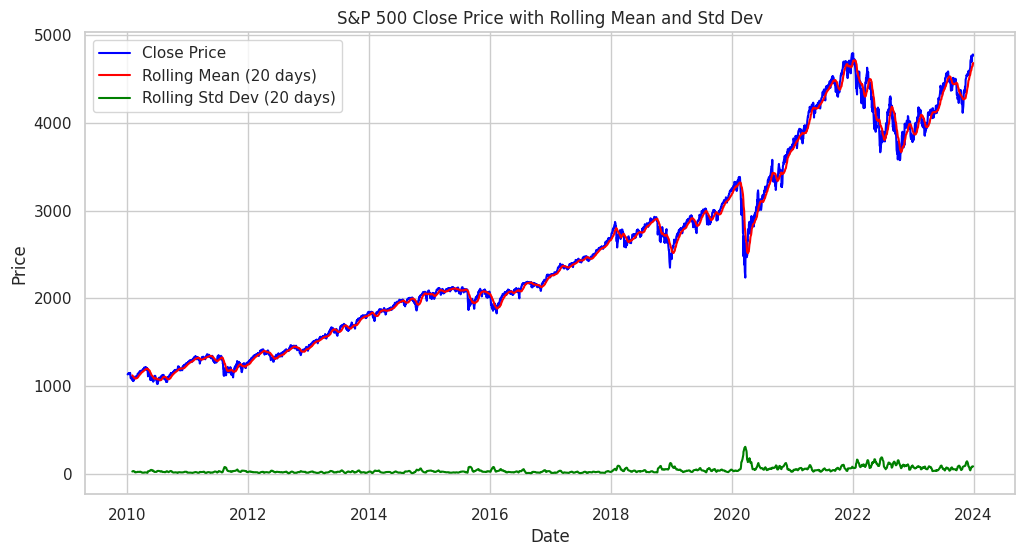

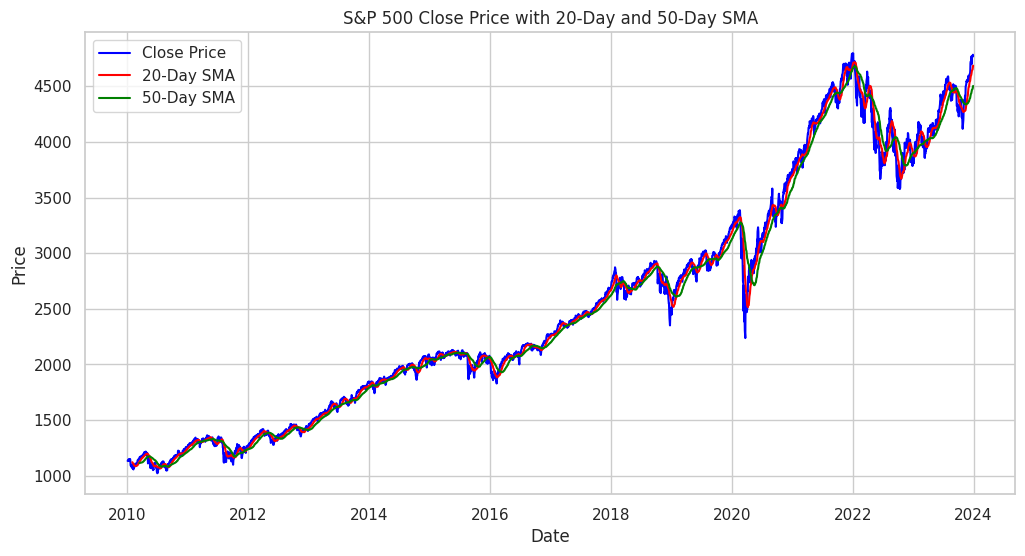

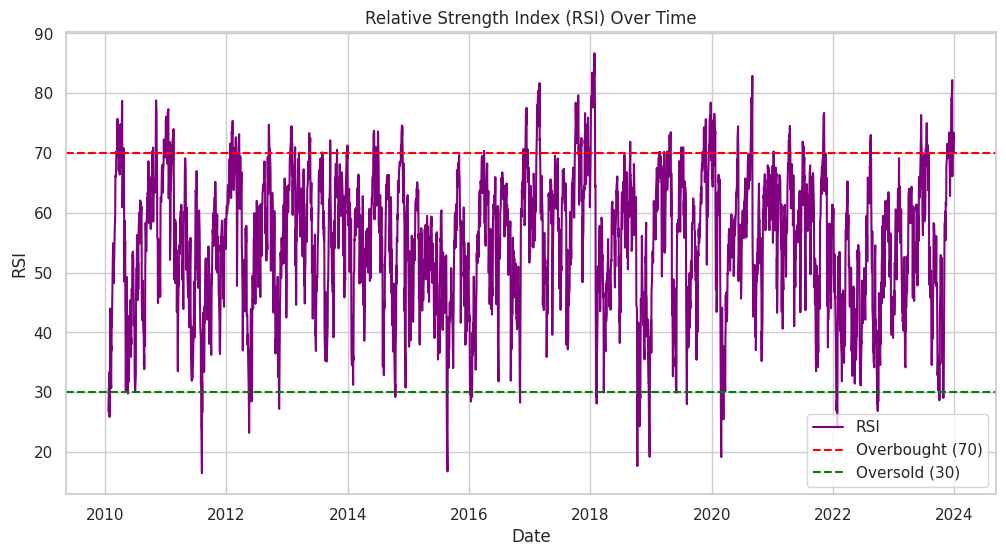

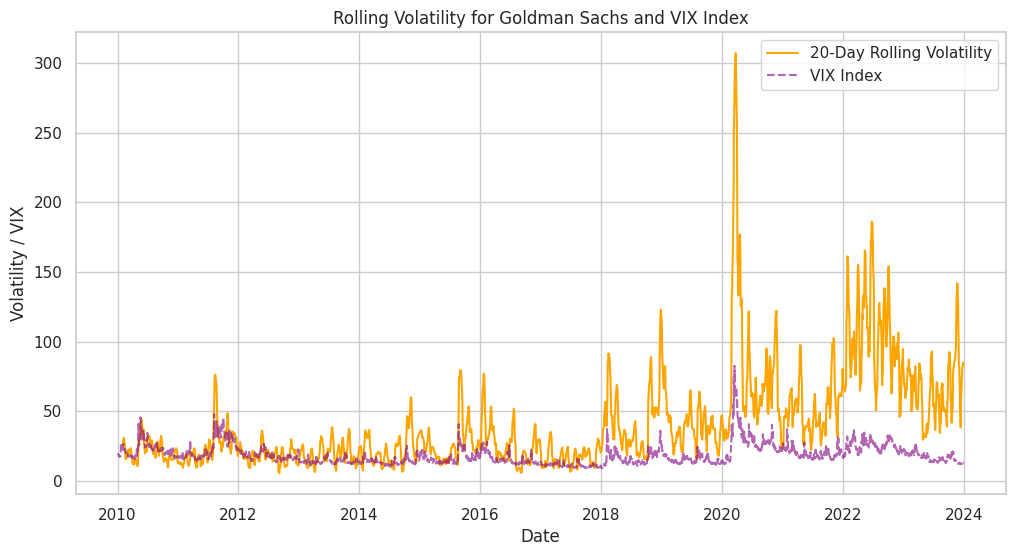

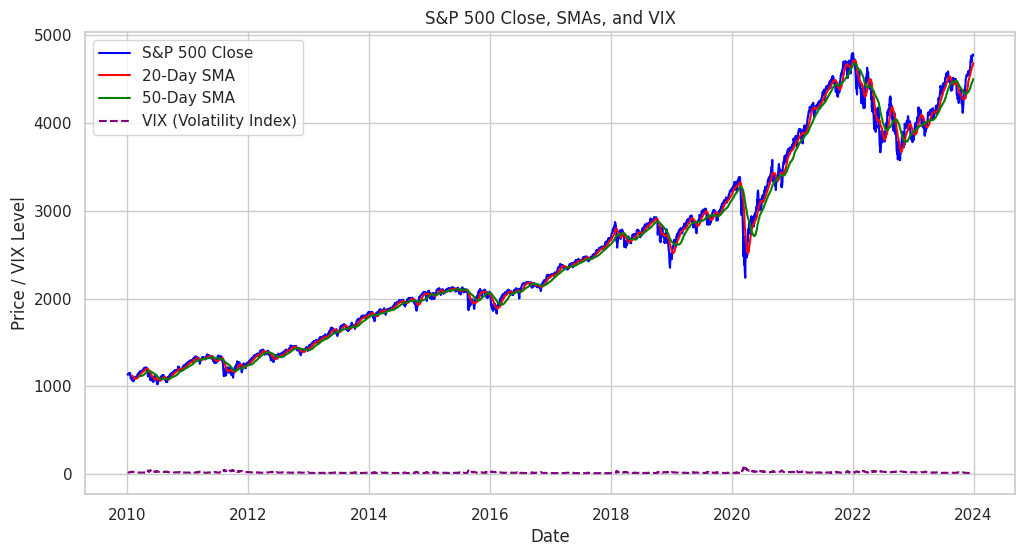

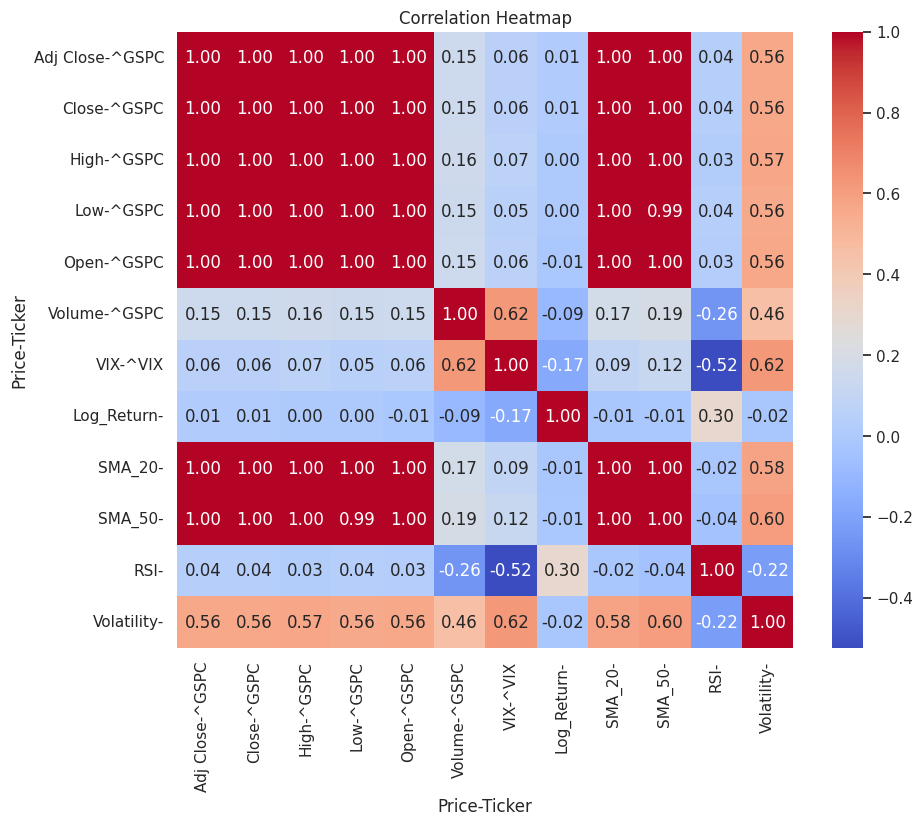

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ta

sns.set(style='whitegrid')

ticker = '^GSPC'
data = yf.download(ticker, start='2010-01-01', end='2024-01-01', interval='1d')

vix = yf.download('^VIX', start='2010-01-01', end='2024-01-01', interval='1d')
vix = vix[['Close']].rename(columns={'Close': 'VIX'})

data = data.join(vix, how='inner')

print("First few rows of the dataset:")
print(data.head())

print("\nMissing values in the dataset:")
print(data.isnull().sum())

data.dropna(inplace=True)

# log returns
data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))

# Creating additional features like 20-day simple moving average, 50-day moving average, RSI and Rolling Std
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['RSI'] = ta.momentum.RSIIndicator(data['Close'].squeeze()).rsi()
data['Volatility'] = data['Close'].rolling(window=20).std()

print("\nCleaned data with additional features:")
print(data.head())

# Summary Statistics
print("\nSummary statistics:")
print(data.describe())

# Closing Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title('S&P 500 Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Log Returns Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Log_Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.show()

# Time Series of Log Returns
plt.figure(figsize=(12, 6))
plt.plot(data['Log_Return'], label='Log Returns', color='orange')
plt.title('Log Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.axhline(0, color='black', lw=2, linestyle='--')
plt.legend()
plt.show()

# Rolling Mean and Standard Deviation
rolling_mean = data['Close'].rolling(window=20).mean()
rolling_std = data['Close'].rolling(window=20).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(rolling_mean, label='Rolling Mean (20 days)', color='red')
plt.plot(rolling_std, label='Rolling Std Dev (20 days)', color='green')
plt.title('S&P 500 Close Price with Rolling Mean and Std Dev')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_20'], label='20-Day SMA', color='red')
plt.plot(data['SMA_50'], label='50-Day SMA', color='green')
plt.title('S&P 500 Close Price with 20-Day and 50-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# RSI
plt.figure(figsize=(12, 6))
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI) Over Time')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Volatility vs VIX
plt.figure(figsize=(12, 6))
plt.plot(data['Volatility'], label='20-Day Rolling Volatility', color='orange')
plt.plot(data['VIX'], label='VIX Index', color='purple', linestyle='--', alpha=0.6)
plt.title('Rolling Volatility for Goldman Sachs and VIX Index')
plt.xlabel('Date')
plt.ylabel('Volatility / VIX')
plt.legend()
plt.show()

# VIX
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='S&P 500 Close', color='blue')
plt.plot(data['SMA_20'], label='20-Day SMA', color='red')
plt.plot(data['SMA_50'], label='50-Day SMA', color='green')
plt.plot(data['VIX'], label='VIX (Volatility Index)', color='purple', linestyle='--')
plt.title('S&P 500 Close, SMAs, and VIX')
plt.xlabel('Date')
plt.ylabel('Price / VIX Level')
plt.legend()
plt.show()


# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Linear Regression Mean Squared Error: 0.001999793643928554
Linear Regression R-squared Score: 0.8248601682896625


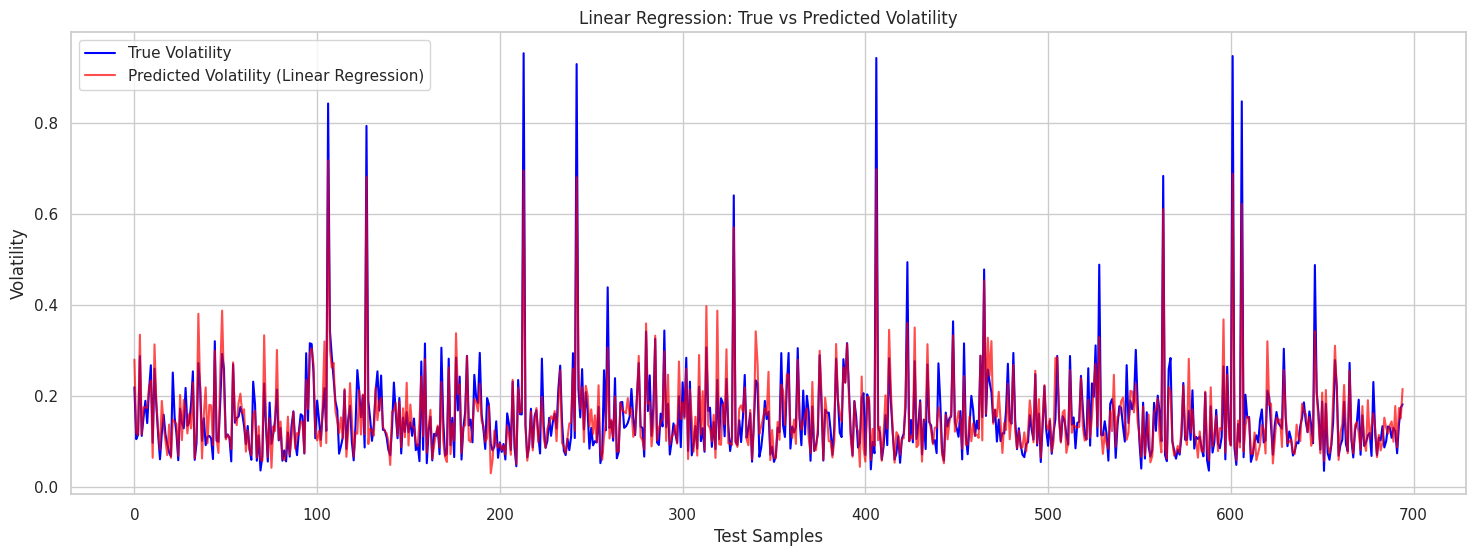

Support Vector Regression Mean Squared Error: 0.011413390014974276
Support Vector Regression R-squared: 0.00042726281489402496


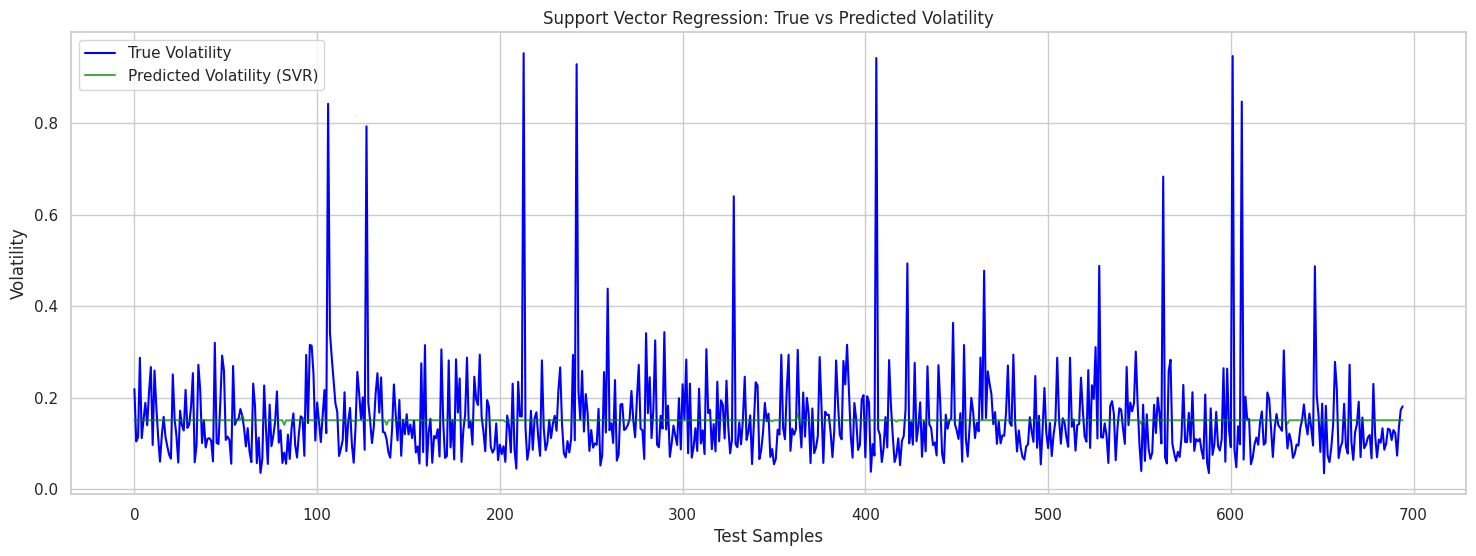


Summary of Model Performance:
Linear Regression MSE: 0.002000, R-squared: 0.824860
Support Vector Regression MSE: 0.011413, R-squared: 0.000427


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

data = yf.download('^GSPC', start='2010-01-01', end='2024-01-01')
data = data[['Close']]

data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))
data['Volatility'] = data['Log_Return'].rolling(window=21).std() * np.sqrt(252)

delta = data['Log_Return'].dropna()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

vix = yf.download('^VIX', start='2010-01-01', end='2024-01-01')
data['VIX'] = vix['Close']

data.dropna(inplace=True)

X = data[['Close', 'SMA_20', 'SMA_50', 'RSI', 'Log_Return', 'VIX']]
y = data['Volatility']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
y_pred_lin_reg = lin_reg_model.predict(X_test)

# Evaluation metrics for Linear Regression
lin_reg_mse = mean_squared_error(y_test, y_pred_lin_reg)
lin_reg_r2 = r2_score(y_test, y_pred_lin_reg)

print("Linear Regression Mean Squared Error:", lin_reg_mse)
print("Linear Regression R-squared Score:", lin_reg_r2)

plt.figure(figsize=(18, 6))
plt.plot(y_test.values, label='True Volatility', color='blue')
plt.plot(y_pred_lin_reg, label='Predicted Volatility (Linear Regression)', color='red', alpha=0.7)
plt.title("Linear Regression: True vs Predicted Volatility")
plt.xlabel("Test Samples")
plt.ylabel("Volatility")
plt.legend()
plt.show()

# Support Vector Regression (SVR)
svr_model = SVR(kernel='rbf', C=100, gamma=0.5, epsilon=0.01)
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

# Evaluation metrics for SVR
svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_r2 = r2_score(y_test, y_pred_svr)

print("Support Vector Regression Mean Squared Error:", svr_mse)
print("Support Vector Regression R-squared:", svr_r2)

plt.figure(figsize=(18, 6))
plt.plot(y_test.values, label='True Volatility', color='blue')
plt.plot(y_pred_svr, label='Predicted Volatility (SVR)', color='green', alpha=0.7)
plt.title("Support Vector Regression: True vs Predicted Volatility")
plt.xlabel("Test Samples")
plt.ylabel("Volatility")
plt.legend()
plt.show()

# Summary of models' performance
print("\nSummary of Model Performance:")
print(f"Linear Regression MSE: {lin_reg_mse:.6f}, R-squared: {lin_reg_r2:.6f}")
print(f"Support Vector Regression MSE: {svr_mse:.6f}, R-squared: {svr_r2:.6f}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Linear Regression Mean Squared Error: 0.0021200329455035027
Linear Regression R-squared Score: 0.7995493711292042


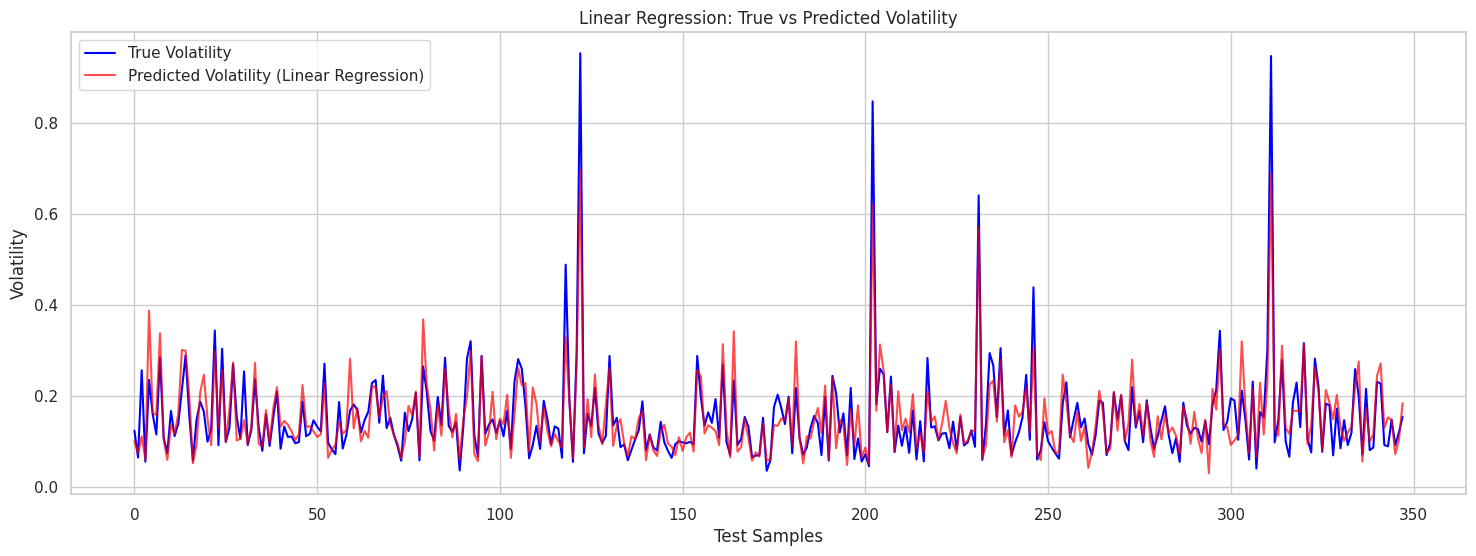

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Download S&P 500 data
data = yf.download('^GSPC', start='2010-01-01', end='2024-01-01')
data = data[['Close']]

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))
data['Volatility'] = data['Log_Return'].rolling(window=21).std() * np.sqrt(252)

# Calculate RSI (Relative Strength Index)
delta = data['Log_Return'].dropna()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Download VIX data
vix = yf.download('^VIX', start='2010-01-01', end='2024-01-01')
data['VIX'] = vix['Close']

# Drop missing values
data.dropna(inplace=True)

# Features and target variable
X = data[['Close', 'SMA_20', 'SMA_50', 'RSI', 'Log_Return', 'VIX']]  # Features
y = data['Volatility']  # Target: Volatility

# Train-test-validation split: 80% training, 10% validation, 10% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Linear Regression Model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Predictions
y_pred_lin_reg = lin_reg_model.predict(X_test)

# Evaluation metrics for Linear Regression
lin_reg_mse = mean_squared_error(y_test, y_pred_lin_reg)
lin_reg_r2 = r2_score(y_test, y_pred_lin_reg)

# Print evaluation results
print("Linear Regression Mean Squared Error:", lin_reg_mse)
print("Linear Regression R-squared Score:", lin_reg_r2)

# Plot: True vs Predicted Volatility (Linear Regression)
plt.figure(figsize=(18, 6))
plt.plot(y_test.values, label='True Volatility', color='blue')
plt.plot(y_pred_lin_reg, label='Predicted Volatility (Linear Regression)', color='red', alpha=0.7)
plt.title("Linear Regression: True vs Predicted Volatility")
plt.xlabel("Test Samples")
plt.ylabel("Volatility")
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

cpu
cpu
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


Best parameters for SVR: {'C': 10, 'epsilon': 0.01, 'gamma': 0.1}


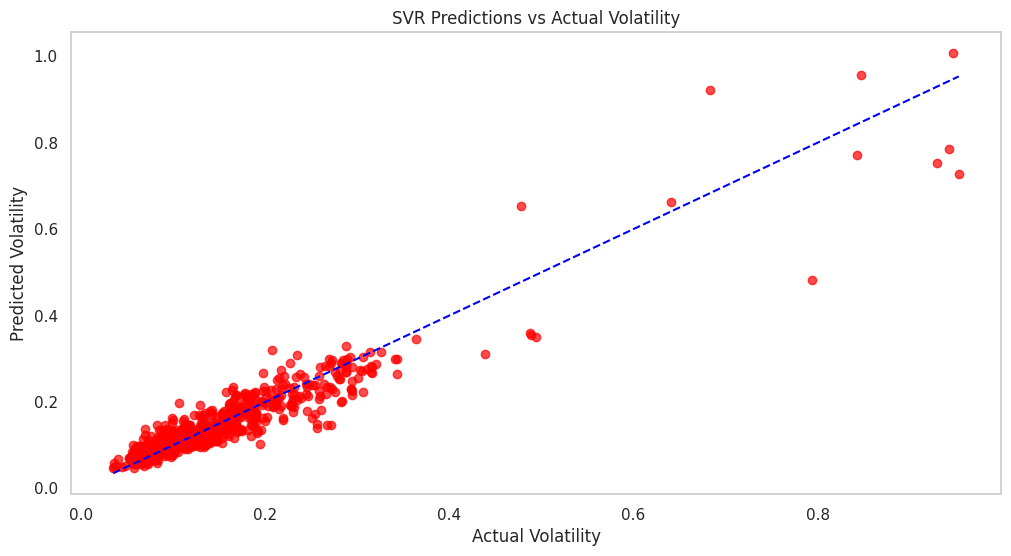


Summary of Model Performance:
Optimized SVR MSE: 0.001327, R-squared: 0.883800


In [ ]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf # Import yfinance to load the data

# Load and preprocess data (similar to what's done in ipython-input-5-3cea8ae17b32)
data = yf.download('^GSPC', start='2010-01-01', end='2024-01-01')
data = data[['Close']]

data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))
data['Volatility'] = data['Log_Return'].rolling(window=21).std() * np.sqrt(252)

delta = data['Log_Return'].dropna()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

vix = yf.download('^VIX', start='2010-01-01', end='2024-01-01')
data['VIX'] = vix['Close']

data.dropna(inplace=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

X = data[['Close', 'SMA_20', 'SMA_50', 'RSI', 'Log_Return', 'VIX']]
y = data['Volatility']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100, 500, 1000],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001, 0.0001],
    'epsilon': [0.001, 0.01, 0.1, 0.25, 0.5, 1]
}

svr = SVR(kernel='rbf')

# Grid search with hyperparameter tuning
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Choosing the best parameters
best_params = grid_search.best_params_
print("Best parameters for SVR:", best_params)

best_svr = grid_search.best_estimator_

y_pred_svr = best_svr.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Results
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_svr, color='red', alpha=0.7, label='Predicted Volatility')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Volatility')
plt.ylabel('Predicted Volatility')
plt.title('SVR Predictions vs Actual Volatility')
plt.grid()
# plt.legend()
plt.show()

print("\nSummary of Model Performance:")
print(f"Optimized SVR MSE: {mse_svr:.6f}, R-squared: {r2_svr:.6f}")

In [ ]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf

# Load and preprocess data
data = yf.download('^GSPC', start='2010-01-01', end='2024-01-01')
data = data[['Close']]

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))
data['Volatility'] = data['Log_Return'].rolling(window=21).std() * np.sqrt(252)

delta = data['Log_Return'].dropna()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Download VIX data
vix = yf.download('^VIX', start='2010-01-01', end='2024-01-01')
data['VIX'] = vix['Close']

data.dropna(inplace=True)

# Feature Matrix and Target Vector
X = data[['Close', 'SMA_20', 'SMA_50', 'RSI', 'Log_Return', 'VIX']]
y = data['Volatility']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 500, 1000],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'epsilon': [0.001, 0.01, 0.1, 0.25, 0.5, 1]
}

# Initialize SVR model
svr = SVR(kernel='rbf')

# Perform grid search for best hyperparameters
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Extract best parameters from grid search
best_params = grid_search.best_params_
print("Best parameters for SVR:", best_params)

# Get the best SVR model
best_svr = grid_search.best_estimator_

# Predict on the test data
y_pred_svr = best_svr.predict(X_test)

# Calculate evaluation metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Plot: True Volatility vs Predicted Volatility (SVR)
plt.figure(figsize=(18, 6))
plt.plot(y_test.values, label='True Volatility', color='blue')
plt.plot(y_pred_svr, label='Predicted Volatility (SVR)', color='red', alpha=0.7)
plt.title("SVR: True vs Predicted Volatility")
plt.xlabel("Test Samples")
plt.ylabel("Volatility")
plt.legend()
plt.show()

# Print model performance
print("\nSummary of Model Performance:")
print(f"Optimized SVR MSE: {mse_svr:.6f}, R-squared: {r2_svr:.6f}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

[*********************100%***********************]  1 of 1 completed


Price         Adj Close        Close         High          Low         Open  \
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC        ^GSPC   
Date                                                                          
2015-01-22  2063.149902  2063.149902  2064.620117  2026.380005  2034.300049   
2015-01-23  2051.820068  2051.820068  2062.979980  2050.540039  2062.979980   
2015-01-26  2057.090088  2057.090088  2057.620117  2040.969971  2050.419922   
2015-01-27  2029.550049  2029.550049  2047.859985  2019.910034  2047.859985   
2015-01-28  2002.160034  2002.160034  2042.489990  2001.489990  2032.339966   

Price           Volume    Return        RSI          EMA  
Ticker           ^GSPC                                    
Date                                                      
2015-01-22  4176050000  0.015270  57.904317  2033.578770  
2015-01-23  3573560000 -0.005492  53.845710  2036.010943  
2015-01-26  3465760000  0.002568  55.411252  2038.821496  
2015-01-27  3

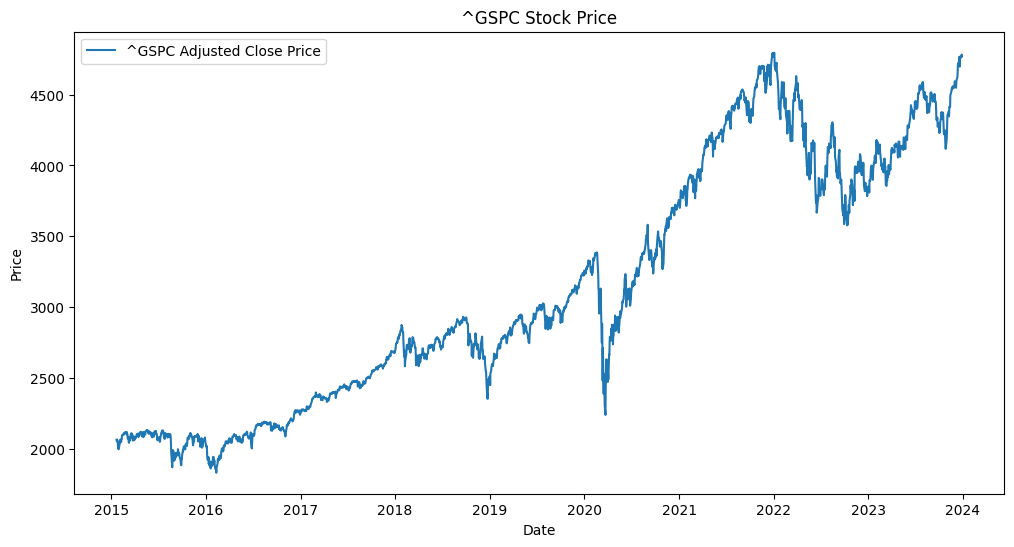

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 14, 50)            11000     
                                                                 
 dropout_2 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31251 (122.07 KB)
Trainable params: 31251 (122.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
56/56

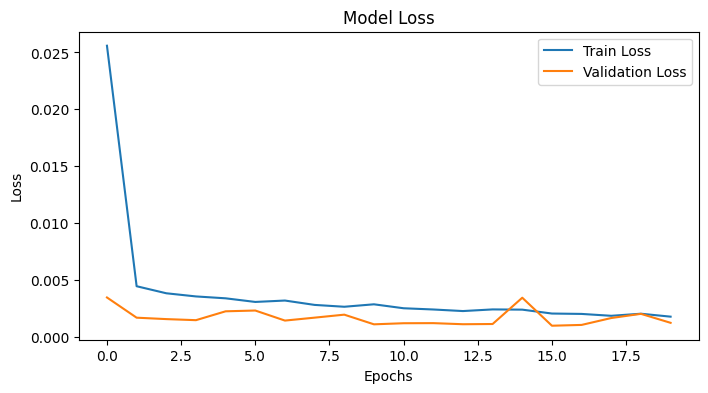

14/14 [==============================] - 0s 5ms/step


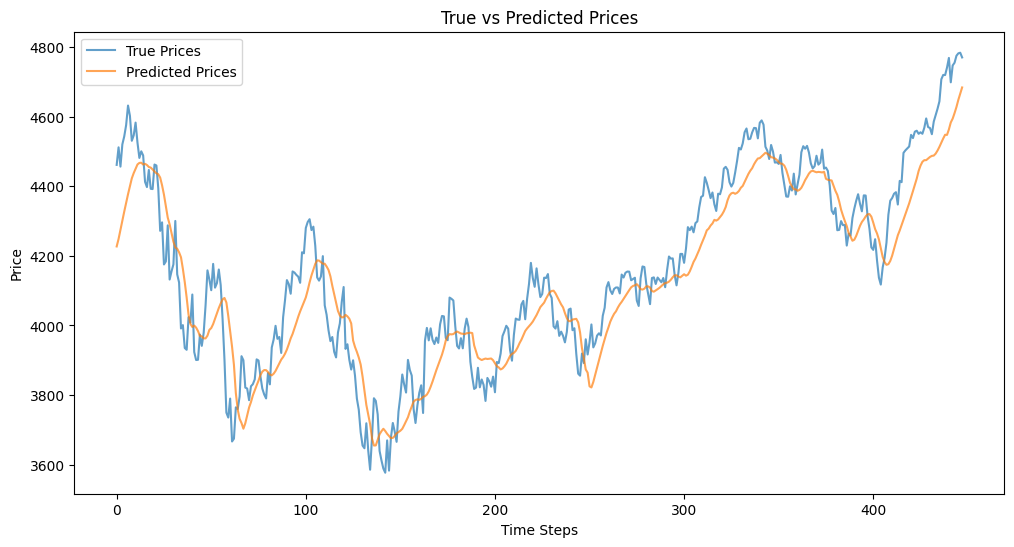

In [ ]:
# Import Libraries
import yfinance as yf
import ta
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Load the Stock Data
def load_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Return'] = data['Adj Close'].pct_change()
    data['RSI'] = ta.momentum.RSIIndicator(data['Adj Close'].squeeze()).rsi()
    data['EMA'] = ta.trend.EMAIndicator(data['Adj Close'].squeeze()).ema_indicator()
    data.dropna(inplace=True)
    return data

# User Inputs
stock_symbol = "^GSPC"
start_date = "2015-01-01"
end_date = "2023-12-31"

data = load_stock_data(stock_symbol, start_date, end_date)
print(data.head())

# Plot the stock price
plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'], label=f"{stock_symbol} Adjusted Close Price")
plt.title(f"{stock_symbol} Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 2: Prepare the Dataset
features = ['Adj Close', 'Volume', 'RSI', 'EMA']
lookback = 14  # Number of historical days to use for prediction

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])

# Create sequences
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i, 0])  # Target is the first column: 'Adj Close'
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, lookback)

# Split into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 3: Build the LSTM Model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(lookback, len(features))),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Step 4: Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 5: Evaluate the Model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Plot Training History
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Rescale predictions and actual values
def rescale(data, predictions):
    dummy_features = np.zeros((len(predictions), len(features) - 1))
    rescaled = scaler.inverse_transform(np.concatenate([predictions, dummy_features], axis=1))
    return rescaled[:, 0]

y_pred_rescaled = rescale(data[features], y_pred)
y_test_rescaled = rescale(data[features], y_test.reshape(-1, 1))

# Plot Predictions vs Actual
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="True Prices", alpha=0.7)
plt.plot(y_pred_rescaled, label="Predicted Prices", alpha=0.7)
plt.title("True vs Predicted Prices")
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.legend()
plt.show()

# # Step 7: Save the Model
# model.save('lstm_stock_model.h5')
# print("Model saved as lstm_stock_model.h5")

[*********************100%***********************]  1 of 1 completed


Price         Adj Close        Close         High          Low         Open  \
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC        ^GSPC   
Date                                                                          
2015-01-22  2063.149902  2063.149902  2064.620117  2026.380005  2034.300049   
2015-01-23  2051.820068  2051.820068  2062.979980  2050.540039  2062.979980   
2015-01-26  2057.090088  2057.090088  2057.620117  2040.969971  2050.419922   
2015-01-27  2029.550049  2029.550049  2047.859985  2019.910034  2047.859985   
2015-01-28  2002.160034  2002.160034  2042.489990  2001.489990  2032.339966   

Price           Volume    Return        RSI          EMA  
Ticker           ^GSPC                                    
Date                                                      
2015-01-22  4176050000  0.015270  57.904317  2033.578770  
2015-01-23  3573560000 -0.005492  53.845710  2036.010943  
2015-01-26  3465760000  0.002568  55.411252  2038.821496  
2015-01-27  3

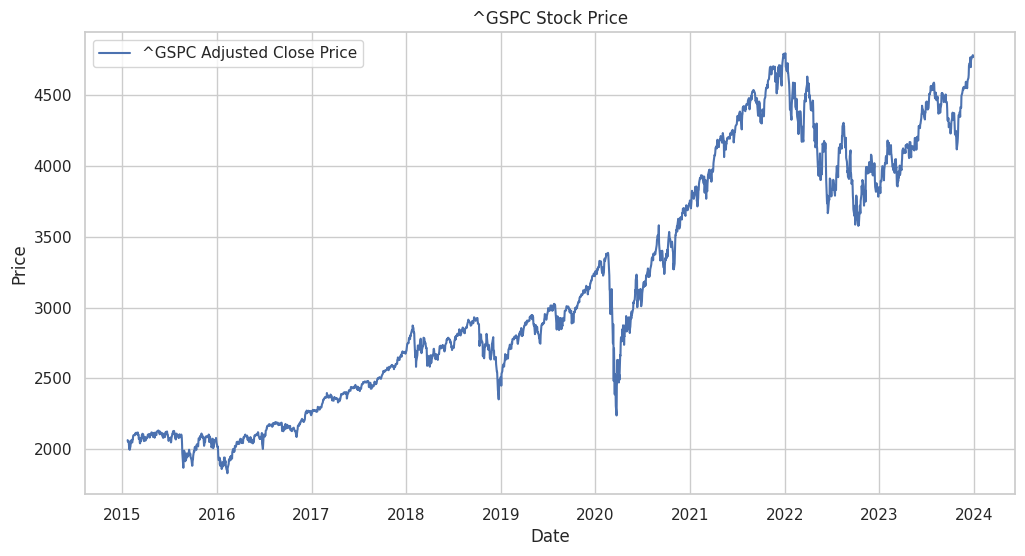

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 14, 50)              │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,251 (122.07 KB)

 Trainable params: 31,251 (122.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - loss: 0.0932 - val_loss: 0.0023
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0063 - val_loss: 0.0016
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - val_loss: 0.0023
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0035 - val_loss: 0.0016
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0031 - val_loss: 0.0049
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - val_loss: 0.0012
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029 - val_loss: 0.0011
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0023 - va

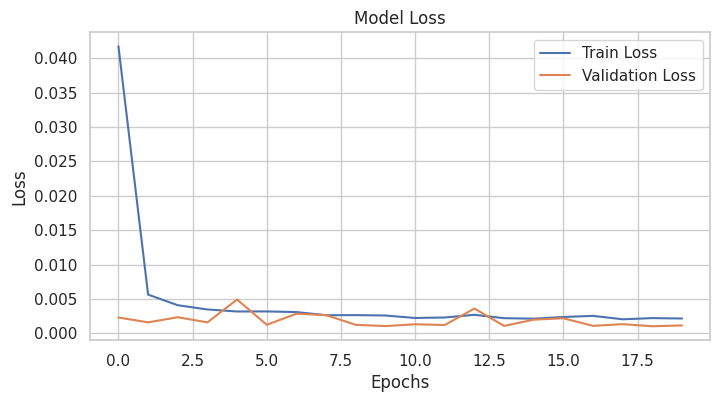

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   


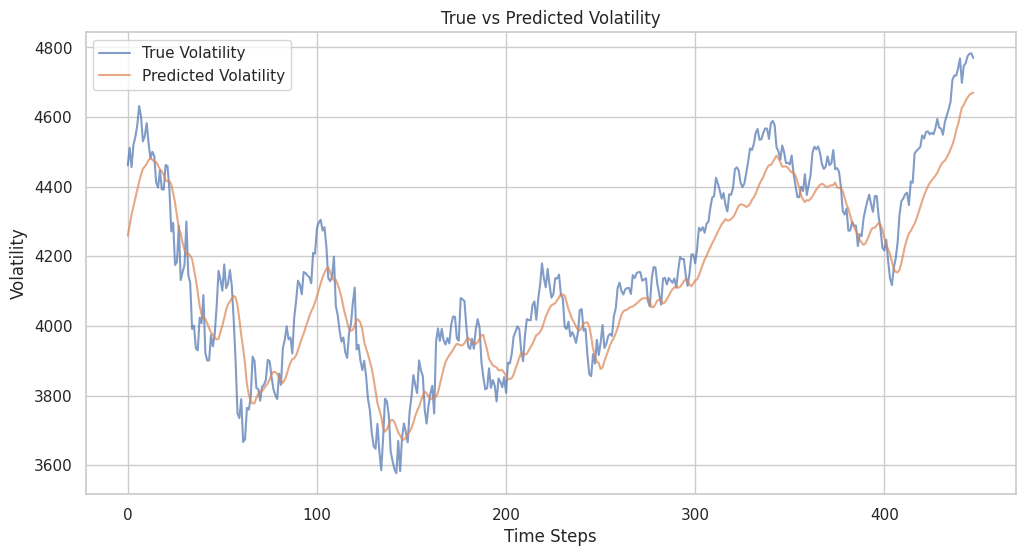


Evaluation Metrics:
Mean Squared Error (MSE): 10082.760503
R-squared (R²): 0.864685


In [ ]:
# Import Libraries
import yfinance as yf
import ta
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the Stock Data
def load_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Return'] = data['Adj Close'].pct_change()
    data['RSI'] = ta.momentum.RSIIndicator(data['Adj Close'].squeeze()).rsi()
    data['EMA'] = ta.trend.EMAIndicator(data['Adj Close'].squeeze()).ema_indicator()
    data.dropna(inplace=True)
    return data

# User Inputs
stock_symbol = "^GSPC"
start_date = "2015-01-01"
end_date = "2023-12-31"

data = load_stock_data(stock_symbol, start_date, end_date)
print(data.head())

# Plot the stock price
plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'], label=f"{stock_symbol} Adjusted Close Price")
plt.title(f"{stock_symbol} Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 2: Prepare the Dataset
features = ['Adj Close', 'Volume', 'RSI', 'EMA']
lookback = 14  # Number of historical days to use for prediction

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])

# Create sequences
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i, 0])  # Target is the first column: 'Adj Close'
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, lookback)

# Split into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 3: Build the LSTM Model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(lookback, len(features))),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Step 4: Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 5: Evaluate the Model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Plot Training History
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Rescale predictions and actual values
def rescale(data, predictions):
    dummy_features = np.zeros((len(predictions), len(features) - 1))
    rescaled = scaler.inverse_transform(np.concatenate([predictions, dummy_features], axis=1))
    return rescaled[:, 0]

y_pred_rescaled = rescale(data[features], y_pred)
y_test_rescaled = rescale(data[features], y_test.reshape(-1, 1))

# Plot Predictions vs Actual
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="True Volatility", alpha=0.7)
plt.plot(y_pred_rescaled, label="Predicted Volatility", alpha=0.7)
plt.title("True vs Predicted Volatility")
plt.xlabel("Time Steps")
plt.ylabel("Volatility")
plt.legend()
plt.show()

# Step 7: Evaluation Metrics (MSE and R²)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print("\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"R-squared (R²): {r2:.6f}")

# # Step 8: Save the Model (optional)
# model.save('lstm_stock_model.h5')
# print("Model saved as lstm_stock_model.h5")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price         Adj Close        Close         High          Low         Open  \
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC        ^GSPC   
Date                                                                          
2015-01-22  2063.149902  2063.149902  2064.620117  2026.380005  2034.300049   
2015-01-23  2051.820068  2051.820068  2062.979980  2050.540039  2062.979980   
2015-01-26  2057.090088  2057.090088  2057.620117  2040.969971  2050.419922   
2015-01-27  2029.550049  2029.550049  2047.859985  2019.910034  2047.859985   
2015-01-28  2002.160034  2002.160034  2042.489990  2001.489990  2032.339966   

Price           Volume    Return        RSI          EMA        VIX  
Ticker           ^GSPC                                               
Date                                                                 
2015-01-22  4176050000  0.015270  57.904317  2033.578770  16.400000  
2015-01-23  3573560000 -0.005492  53.845710  2036.010943  16.660000  
2015-01-26  34657

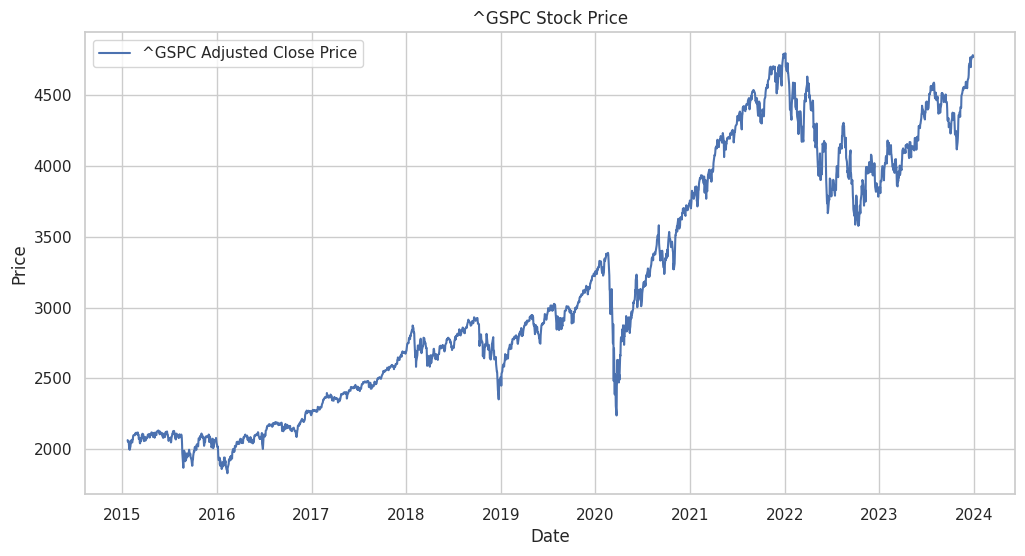

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 14, 50)              │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.0836 - val_loss: 0.0033
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0049 - val_loss: 0.0019
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0045 - val_loss: 0.0017
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - val_loss: 0.0028
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - val_loss: 0.0010
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0027 - val_l

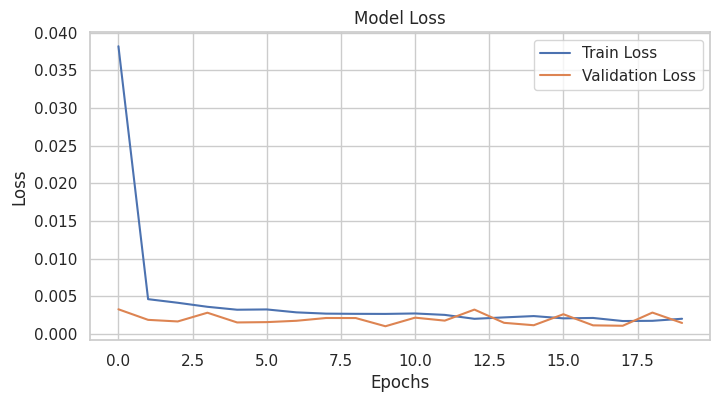

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


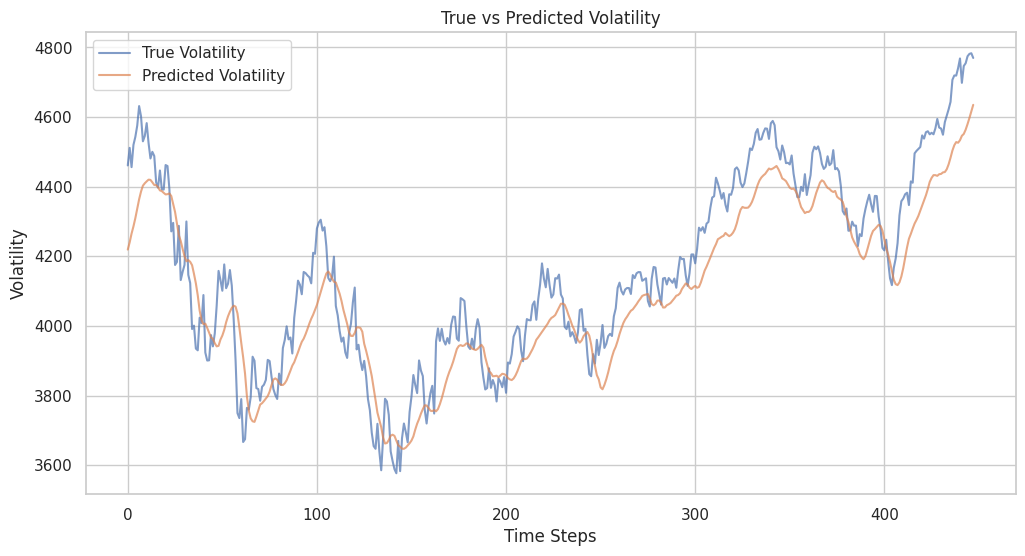


Evaluation Metrics:
Mean Squared Error (MSE): 13021.813038
R-squared (R²): 0.825242


In [ ]:
#LSTM With VIX

# Import Libraries
import yfinance as yf
import ta
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the Stock Data and VIX Data
def load_stock_data(ticker, start_date, end_date):
    # Load stock data
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Return'] = data['Adj Close'].pct_change()
    data['RSI'] = ta.momentum.RSIIndicator(data['Adj Close'].squeeze()).rsi()
    data['EMA'] = ta.trend.EMAIndicator(data['Adj Close'].squeeze()).ema_indicator()

    # Download VIX data
    vix = yf.download('^VIX', start=start_date, end=end_date)
    data['VIX'] = vix['Close']  # Use VIX closing price

    data.dropna(inplace=True)
    return data

# User Inputs
stock_symbol = "^GSPC"
start_date = "2015-01-01"
end_date = "2023-12-31"

data = load_stock_data(stock_symbol, start_date, end_date)
print(data.head())

# Plot the stock price
plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'], label=f"{stock_symbol} Adjusted Close Price")
plt.title(f"{stock_symbol} Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 2: Prepare the Dataset
features = ['Adj Close', 'Volume', 'RSI', 'EMA', 'VIX']  # Add VIX as a feature
lookback = 14  # Number of historical days to use for prediction

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])

# Create sequences
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i, 0])  # Target is the first column: 'Adj Close'
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, lookback)

# Split into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 3: Build the LSTM Model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(lookback, len(features))),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Step 4: Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 5: Evaluate the Model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Plot Training History
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Rescale predictions and actual values
def rescale(data, predictions):
    dummy_features = np.zeros((len(predictions), len(features) - 1))
    rescaled = scaler.inverse_transform(np.concatenate([predictions, dummy_features], axis=1))
    return rescaled[:, 0]

y_pred_rescaled = rescale(data[features], y_pred)
y_test_rescaled = rescale(data[features], y_test.reshape(-1, 1))

# Plot Predictions vs Actual
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="True Volatility", alpha=0.7)
plt.plot(y_pred_rescaled, label="Predicted Volatility", alpha=0.7)
plt.title("True vs Predicted Volatility")
plt.xlabel("Time Steps")
plt.ylabel("Volatility")
plt.legend()
plt.show()

# Step 7: Evaluation Metrics (MSE and R²)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print("\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"R-squared (R²): {r2:.6f}")

# # Step 8: Save the Model (optional)
# model.save('lstm_stock_model.h5')
# print("Model saved as lstm_stock_model.h5")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Iteration:      1,   Func. Count:      6,   Neg. LLF: 2506934233837.353
Iteration:      2,   Func. Count:     15,   Neg. LLF: 5332.138460820601
Iteration:      3,   Func. Count:     25,   Neg. LLF: 3072.259918672082
Iteration:      4,   Func. Count:     32,   Neg. LLF: 3243.4063840780755
Iteration:      5,   Func. Count:     38,   Neg. LLF: 2396.8898785638476
Iteration:      6,   Func. Count:     44,   Neg. LLF: 2388.9430432735767
Iteration:      7,   Func. Count:     49,   Neg. LLF: 2388.8995148111403
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2388.898414797186
Iteration:      9,   Func. Count:     59,   Neg. LLF: 2388.898403284299
Iteration:     10,   Func. Count:     64,   Neg. LLF: 2388.8983971687694
Iteration:     11,   Func. Count:     68,   Neg. LLF: 2388.8983971691605
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2388.8983971687694
            Iterations: 11
            Function evaluations: 68
            Gradient evaluati

KeyError: ['actual_volatility']

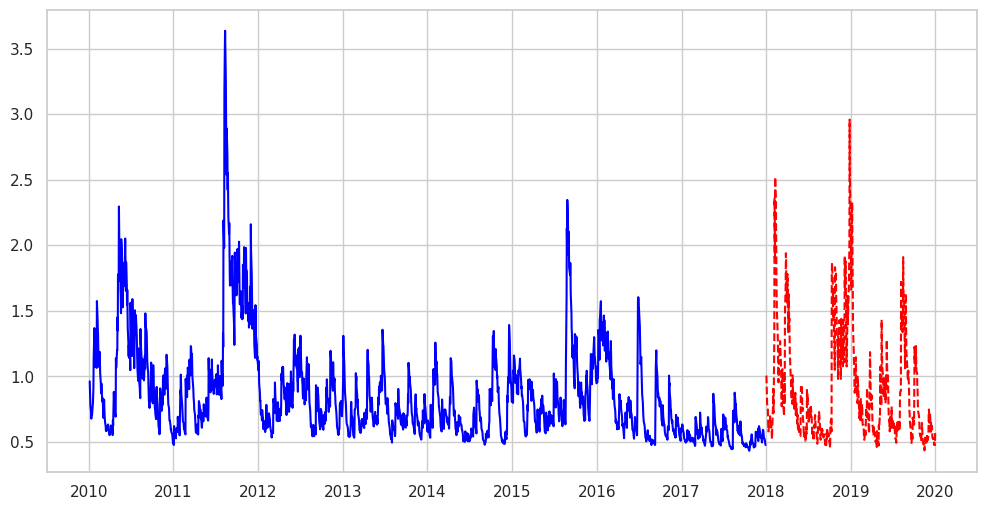

In [ ]:
#simple GARCH

import yfinance as yf
import numpy as np
import pandas as pd
from arch import arch_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # S&P 500 Index ticker symbol
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbol and try again.")

# Calculate daily returns
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Download VIX data (Implied Volatility)
vix = yf.download('^VIX', start=start_date, end=end_date)
data['VIX'] = vix['Close']  # Use VIX closing price as an external regressor

# Drop NaN values
data.dropna(inplace=True)

# Step 2: Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Step 3: Fit GARCH Model with VIX as an exogenous regressor on training data

# Prepare the GARCH model with VIX as an external regressor
model_garch = arch_model(train_data['return'] * 100, vol='Garch', p=1, q=1, x=train_data['VIX'])
garch_result = model_garch.fit()

# Print GARCH model results
print(garch_result.summary())

# Step 4: Get the GARCH volatility estimate for training data
train_garch_volatility = garch_result.conditional_volatility
train_data['garch_volatility'] = train_garch_volatility

# Step 5: Generate GARCH Volatility forecasts for the test data

# We need to fit a new GARCH model on the test data to make predictions.
# For simplicity, let's predict volatility using the last values of the training set.

# Prepare the model with VIX for test data
model_garch_test = arch_model(test_data['return'] * 100, vol='Garch', p=1, q=1, x=test_data['VIX'])
garch_result_test = model_garch_test.fit()

# Get the predicted GARCH volatility for the test data
test_garch_volatility = garch_result_test.conditional_volatility
test_data['garch_volatility'] = test_garch_volatility

# Step 6: Visualize the Predicted vs Actual Volatility

plt.figure(figsize=(12, 6))

# Plot actual vs predicted volatility (GARCH Volatility) for training and test data
plt.plot(train_data.index, train_data['garch_volatility'], label='Train GARCH Volatility', color='blue')
plt.plot(test_data.index, test_data['garch_volatility'], label='Test GARCH Volatility (Predicted)', color='red', linestyle='--')

# Calculate and plot the actual volatility (21-day rolling window for standard deviation) on test data
test_data['actual_volatility'] = test_data['return'].rolling(window=21).std() * np.sqrt(252)
test_data.dropna(subset=['actual_volatility'], inplace=True)
plt.plot(test_data.index, test_data['actual_volatility'], label='Actual Volatility', color='green')

plt.title('GARCH Volatility Forecasting: Predicted vs Actual Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Step 7: Evaluate the GARCH Model Performance (MSE and R²)

# Calculate Mean Squared Error (MSE) for the test set
mse = mean_squared_error(test_data['actual_volatility'], test_data['garch_volatility'])
print(f"Mean Squared Error (MSE): {mse:.6f}")

# Calculate R-squared (R²) for the test set
r2 = r2_score(test_data['actual_volatility'], test_data['garch_volatility'])
print(f"R-squared (R²): {r2:.6f}")

[*********************100%***********************]  1 of 1 completed


Iteration:      1,   Func. Count:      6,   Neg. LLF: 3196053.121254978
Iteration:      2,   Func. Count:     15,   Neg. LLF: 12712762060.94161
Iteration:      3,   Func. Count:     23,   Neg. LLF: 4240.427539426197
Iteration:      4,   Func. Count:     31,   Neg. LLF: 4167.421668956445
Iteration:      5,   Func. Count:     37,   Neg. LLF: 3013.915670678073
Iteration:      6,   Func. Count:     43,   Neg. LLF: 3001.6749490883176
Iteration:      7,   Func. Count:     48,   Neg. LLF: 3001.641705618438
Iteration:      8,   Func. Count:     53,   Neg. LLF: 3001.637935459459
Iteration:      9,   Func. Count:     58,   Neg. LLF: 3001.637093967207
Iteration:     10,   Func. Count:     63,   Neg. LLF: 3001.637080694408
Iteration:     11,   Func. Count:     67,   Neg. LLF: 3001.637080694405
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3001.637080694408
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0104
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0040
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0036
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0030
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0022
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0022
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0019
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0019
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0016
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0014
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


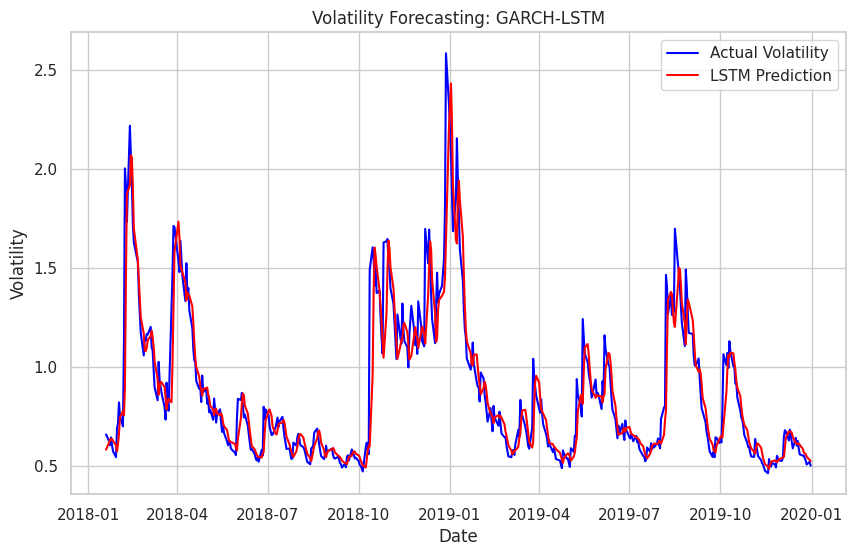

Mean Squared Error (MSE): 0.021249
R-squared (R²): 0.847391


In [ ]:
# GARCH-LSTM

import yfinance as yf
import numpy as np
import tensorflow as tf
from arch import arch_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # Corrected S&P 500 Index ticker symbol
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbol and try again.")

# Calculate daily returns
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Step 2: Model 1 - GARCH with LSTM (Volatility Forecasting)

# 2.1 Fit GARCH model to estimate volatility
model_garch = arch_model(data['return'] * 100, vol='Garch', p=1, q=1)
garch_result = model_garch.fit()

# 2.2 Get the GARCH volatility estimate
garch_volatility = garch_result.conditional_volatility
data['garch_volatility'] = garch_volatility

# 2.3 Scale the GARCH volatility for LSTM input
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_volatility = scaler.fit_transform(data['garch_volatility'].values.reshape(-1, 1))

# 2.4 Prepare the data for LSTM (using past 60 time-steps to predict next)
def create_dataset(volatility, time_step=60):
    X, y = [], []
    for i in range(len(volatility) - time_step - 1):
        X.append(volatility[i:(i + time_step), 0])  # LSTM input: past volatility
        y.append(volatility[i + time_step, 0])      # LSTM output: future volatility
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_volatility)

# Reshape for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 3: Build the LSTM model
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(units=50, return_sequences=False),
    tf.keras.layers.Dense(units=1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the LSTM model
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32)

# Step 5: Predict volatility using the LSTM model
lstm_pred = model_lstm.predict(X_test)

# Inverse scaling to get original values
lstm_pred = scaler.inverse_transform(lstm_pred)

# Step 6: Visualize Predictions
plt.figure(figsize=(10, 6))

# Plot actual vs predicted volatility for LSTM
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Volatility', color='blue')
plt.plot(data.index[-len(lstm_pred):], lstm_pred, label='LSTM Prediction', color='red')

plt.legend()
plt.title('Volatility Forecasting: GARCH-LSTM')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

# Step 7: Evaluation Metrics (MSE and R²)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), lstm_pred)
print(f"Mean Squared Error (MSE): {mse:.6f}")

# Calculate R² (R-squared)
r2 = r2_score(scaler.inverse_transform(y_test.reshape(-1, 1)), lstm_pred)
print(f"R-squared (R²): {r2:.6f}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iteration:      1,   Func. Count:      6,   Neg. LLF: 3196053.121254978
Iteration:      2,   Func. Count:     15,   Neg. LLF: 12712762060.94161
Iteration:      3,   Func. Count:     23,   Neg. LLF: 4240.427539426197
Iteration:      4,   Func. Count:     31,   Neg. LLF: 4167.421668956445
Iteration:      5,   Func. Count:     37,   Neg. LLF: 3013.915670678073
Iteration:      6,   Func. Count:     43,   Neg. LLF: 3001.6749490883176
Iteration:      7,   Func. Count:     48,   Neg. LLF: 3001.641705618438
Iteration:      8,   Func. Count:     53,   Neg. LLF: 3001.637935459459
Iteration:      9,   Func. Count:     58,   Neg. LLF: 3001.637093967207
Iteration:     10,   Func. Count:     63,   Neg. LLF: 3001.637080694408
Iteration:     11,   Func. Count:     67,   Neg. LLF: 3001.637080694405
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3001.637080694408
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 1

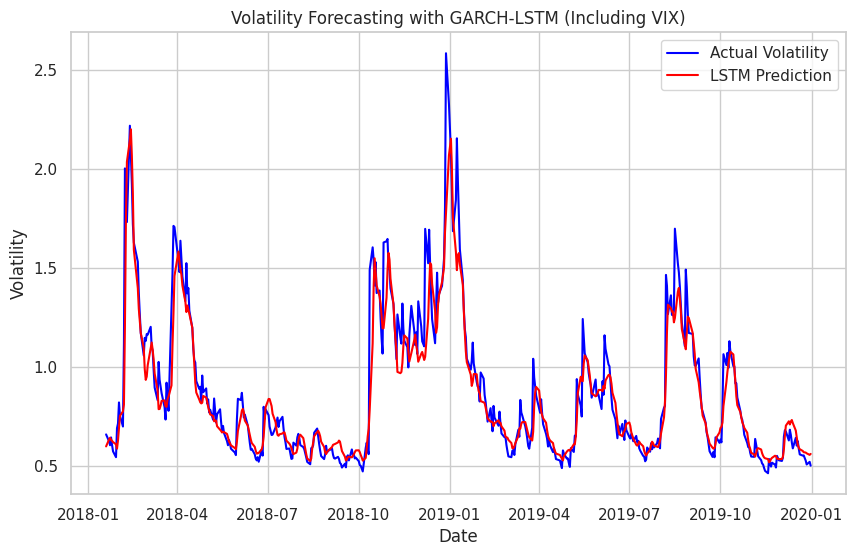

In [ ]:
# GARCH-LSTM (with VIX)

import yfinance as yf
import numpy as np
import tensorflow as tf
from arch import arch_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # Corrected S&P 500 Index ticker symbol
vix_ticker = '^VIX'  # VIX (Volatility Index)
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the S&P 500 data
data = yf.download(ticker, start=start_date, end=end_date)

# Download the VIX data
vix_data = yf.download(vix_ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty or vix_data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbols and try again.")

# Calculate daily returns for the S&P 500 data
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Align the VIX data with the S&P 500 data
data['vix'] = vix_data['Adj Close'].reindex(data.index, method='ffill')

# Step 2: Model 1 - GARCH with LSTM (Volatility Forecasting)

# 2.1 Fit GARCH model to estimate volatility
model_garch = arch_model(data['return'] * 100, vol='Garch', p=1, q=1)
garch_result = model_garch.fit()

# 2.2 Get the GARCH volatility estimate
garch_volatility = garch_result.conditional_volatility
data['garch_volatility'] = garch_volatility

# 2.3 Scale the GARCH volatility and VIX for LSTM input
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['garch_volatility', 'vix']].values)

# Step 3: Prepare the data for LSTM (using past 60 time-steps to predict next)
def create_dataset(volatility, time_step=60):
    X, y = [], []
    for i in range(len(volatility) - time_step - 1):
        X.append(volatility[i:(i + time_step), :])  # LSTM input: past volatility and VIX
        y.append(volatility[i + time_step, 0])      # LSTM output: future volatility
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)

# Reshape for LSTM input
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])  # Input shape: (samples, time steps, features)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Build the LSTM model
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(units=50, return_sequences=False),
    tf.keras.layers.Dense(units=1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the LSTM model
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32)

# Step 6: Predict volatility using the LSTM model
lstm_pred = model_lstm.predict(X_test)

# Inverse scaling to get original volatility values
lstm_pred = scaler.inverse_transform(np.concatenate([lstm_pred, np.zeros((lstm_pred.shape[0], 1))], axis=1))[:, 0]

# Step 7: Evaluate the model and calculate metrics (MSE and R²)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))], axis=1))[:, 0], lstm_pred)
print(f"Mean Squared Error (MSE): {mse:.6f}")

# Calculate R² (R-squared)
r2 = r2_score(scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))], axis=1))[:, 0], lstm_pred)
print(f"R-squared (R²): {r2:.6f}")

# Step 8: Visualize Predictions

plt.figure(figsize=(10, 6))

# Plot actual vs predicted volatility for LSTM
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))], axis=1))[:, 0], label='Actual Volatility', color='blue')
plt.plot(data.index[-len(lstm_pred):], lstm_pred, label='LSTM Prediction', color='red')

plt.legend()
plt.title('Volatility Forecasting with GARCH-LSTM (Including VIX)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iteration:      1,   Func. Count:      6,   Neg. LLF: 8867808478.479439
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2090473902.1358948
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6649.519167095133
Iteration:      4,   Func. Count:     28,   Neg. LLF: 5415.3151420678105
Iteration:      5,   Func. Count:     36,   Neg. LLF: 5705.353534020161
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4806.46117564615
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4806.449793851694
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4806.448341571813
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4806.44834085084
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4806.44834085084
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0029
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 3/10
93/93

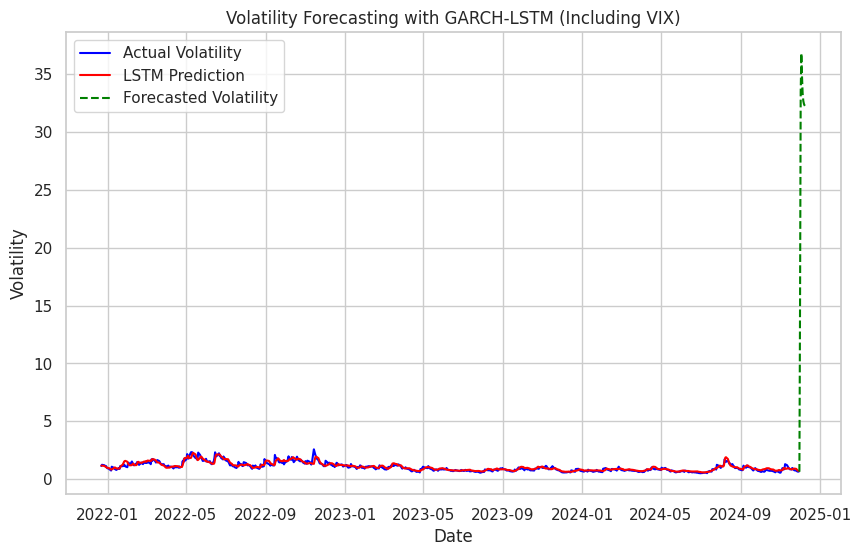

Forecasted Volatility for 2024-11-30: 0.6415
Forecasted Volatility for 2024-12-01: 15.2108
Forecasted Volatility for 2024-12-02: 33.4520
Forecasted Volatility for 2024-12-03: 36.7967
Forecasted Volatility for 2024-12-04: 34.8281
Forecasted Volatility for 2024-12-05: 33.3175
Forecasted Volatility for 2024-12-06: 32.6815
Forecasted Volatility for 2024-12-07: 32.4190
Forecasted Volatility for 2024-12-08: 32.2876
Forecasted Volatility for 2024-12-09: 32.2113
Forecasted Volatility for 2024-12-10: 32.1638


In [ ]:
#Prediction

import yfinance as yf
import numpy as np
import tensorflow as tf
from arch import arch_model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # Corrected S&P 500 Index ticker symbol
vix_ticker = '^VIX'  # VIX (Volatility Index)
start_date = '2010-01-01'  # Start date for data download
end_date = '2024-12-01'    # End date for data download

# Download the S&P 500 data
data = yf.download(ticker, start=start_date, end=end_date)

# Download the VIX data
vix_data = yf.download(vix_ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty or vix_data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbols and try again.")

# Calculate daily returns for the S&P 500 data
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Align the VIX data with the S&P 500 data
data['vix'] = vix_data['Adj Close'].reindex(data.index, method='ffill')

# Step 2: Fit GARCH model to estimate volatility
model_garch = arch_model(data['return'] * 100, vol='Garch', p=1, q=1)
garch_result = model_garch.fit()

# Get the GARCH volatility estimate
garch_volatility = garch_result.conditional_volatility
data['garch_volatility'] = garch_volatility

# Step 3: Scale the GARCH volatility and VIX for LSTM input
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['garch_volatility', 'vix']].values)

# Step 4: Prepare the data for LSTM (using past 60 time-steps to predict next)
def create_dataset(volatility, time_step=60):
    X, y = [], []
    for i in range(len(volatility) - time_step - 1):
        X.append(volatility[i:(i + time_step), :])  # LSTM input: past volatility and VIX
        y.append(volatility[i + time_step, 0])      # LSTM output: future volatility
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)

# Reshape for LSTM input
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])  # Input shape: (samples, time steps, features)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Build the LSTM model
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(units=50, return_sequences=False),
    tf.keras.layers.Dense(units=1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train the LSTM model
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32)

# Step 7: Predict volatility using the LSTM model
lstm_pred = model_lstm.predict(X_test)

# Inverse scaling to get original volatility values
lstm_pred = scaler.inverse_transform(np.concatenate([lstm_pred, np.zeros((lstm_pred.shape[0], 1))], axis=1))[:, 0]

# Step 8: Forecasting for future days until December 10, 2024

# Start with the last 60 time steps of the original data for forecasting
last_time_steps = scaled_data[-60:]  # Last 60 time steps (scaled)

# Define the number of days to forecast
forecast_days = (pd.to_datetime('2024-12-10') - data.index[-1]).days

# Store the predictions
predictions = []
dates = []

# Forecasting loop
for i in range(forecast_days):
    # Reshape to be compatible with the LSTM model input
    last_time_steps = last_time_steps.reshape((1, 60, 2))  # 1 sample, 60 time steps, 2 features (volatility and vix)

    # Predict the next volatility
    predicted_volatility = model_lstm.predict(last_time_steps)

    # Inverse scaling to get the original predicted volatility
    predicted_volatility = scaler.inverse_transform(np.concatenate([predicted_volatility, np.zeros((predicted_volatility.shape[0], 1))], axis=1))[:, 0]

    # Get the most recent VIX value using ffill
    predicted_date = data.index[-1] + pd.Timedelta(days=i+1)  # Next day after last date in dataset
    latest_vix = vix_data['Adj Close'].reindex([predicted_date], method='ffill').values[0]

    # Create a new row with the predicted volatility and the most recent VIX value
    new_data = np.array([[predicted_volatility[0], latest_vix.item()]])

    # Ensure that the new data is a 2D array with shape (1, 2)
    if new_data.shape != (1, 2):
        raise ValueError(f"Expected new_data shape (1, 2), but got {new_data.shape}")

    # Update the last_time_steps with the new prediction (shifting the window)
    last_time_steps = np.vstack([last_time_steps[0][1:], new_data])

    # Store the forecasted value and its corresponding date
    predictions.append(predicted_volatility[0])
    dates.append(predicted_date)

# Step 9: Plotting the forecasted volatility

plt.figure(figsize=(10, 6))

# Plot actual volatility
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))], axis=1))[:, 0], label='Actual Volatility', color='blue')

# Plot the predicted volatility
plt.plot(data.index[-len(lstm_pred):], lstm_pred, label='LSTM Prediction', color='red')

# Plot the forecasted volatility for the next days
plt.plot(dates, predictions, label='Forecasted Volatility', color='green', linestyle='dashed')

plt.legend()
plt.title('Volatility Forecasting with GARCH-LSTM (Including VIX)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

# Print the forecasted values for December 2024
for forecast_date, forecast_value in zip(dates, predictions):
    print(f"Forecasted Volatility for {forecast_date.date()}: {forecast_value:.4f}")

[*********************100%***********************]  1 of 1 completed


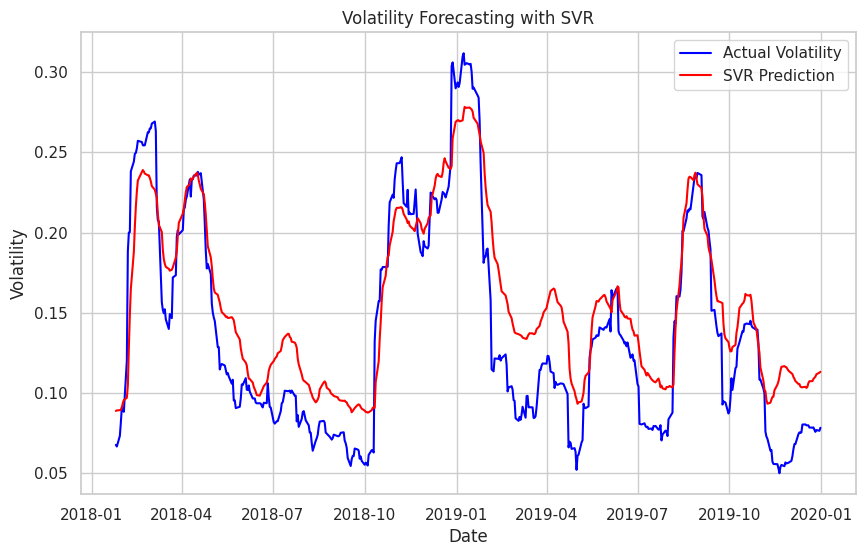

Mean Squared Error (MSE): 0.000957
R-squared (R²): 0.782936


In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # S&P 500 Index ticker symbol
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbol and try again.")

# Calculate daily returns
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Step 2: Preprocess the data for SVR model

# 2.1: Use rolling window to calculate historical volatility (standard deviation of returns)
window_size = 20  # Using 20-day rolling window for volatility estimation
data['volatility'] = data['return'].rolling(window=window_size).std() * np.sqrt(252)  # Annualized volatility

# Drop NaN values caused by rolling window
data = data.dropna()

# 2.2: Scale the volatility for SVR input
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_volatility = scaler.fit_transform(data['volatility'].values.reshape(-1, 1))

# 2.3: Prepare the data for SVR
def create_dataset(volatility, time_step=60):
    X, y = [], []
    for i in range(len(volatility) - time_step - 1):
        X.append(volatility[i:(i + time_step), 0])  # SVR input: past volatility
        y.append(volatility[i + time_step, 0])      # SVR output: future volatility
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_volatility)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 3: Build the SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# 3.1: Train the SVR model
svr_model.fit(X_train, y_train)

# Step 4: Predict volatility using the SVR model
svr_pred = svr_model.predict(X_test)

# Inverse scaling to get original volatility values
svr_pred = scaler.inverse_transform(svr_pred.reshape(-1, 1))

# Step 5: Visualize Predictions

plt.figure(figsize=(10, 6))

# Plot actual vs predicted volatility for SVR
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Volatility', color='blue')
plt.plot(data.index[-len(svr_pred):], svr_pred, label='SVR Prediction', color='red')

plt.legend()
plt.title('Volatility Forecasting with SVR')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

# Step 6: Evaluation Metrics (MSE and R²)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), svr_pred)
print(f"Mean Squared Error (MSE): {mse:.6f}")

# Calculate R² (R-squared)
r2 = r2_score(scaler.inverse_transform(y_test.reshape(-1, 1)), svr_pred)
print(f"R-squared (R²): {r2:.6f}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


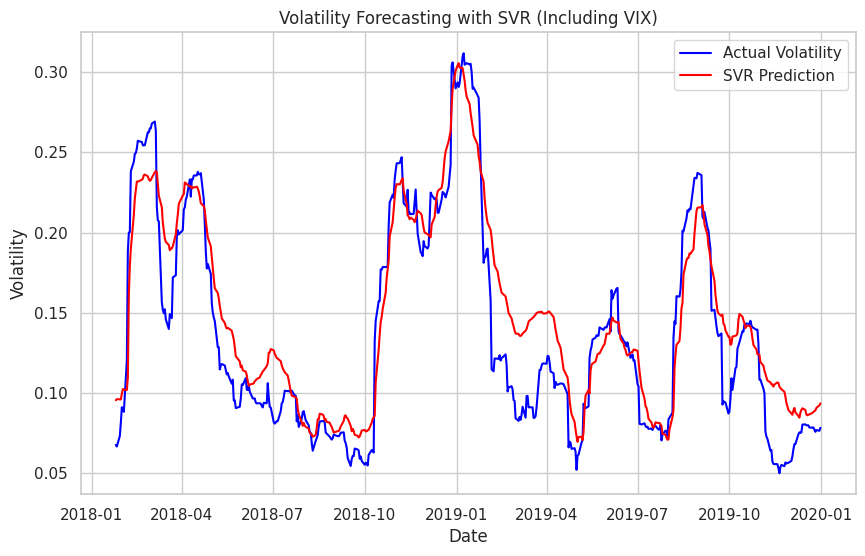

Mean Squared Error (MSE): 0.000685
R-squared (R²): 0.844710


In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # S&P 500 Index ticker symbol
vix_ticker = '^VIX'  # VIX (Volatility Index)
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)
vix_data = yf.download(vix_ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty or vix_data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbols and try again.")

# Calculate daily returns for the S&P 500 data
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Step 2: Preprocess the data for SVR model

# 2.1: Use rolling window to calculate historical volatility (standard deviation of returns)
window_size = 20  # Using 20-day rolling window for volatility estimation
data['volatility'] = data['return'].rolling(window=window_size).std() * np.sqrt(252)  # Annualized volatility

# Drop NaN values caused by rolling window
data = data.dropna()

# 2.2: Add VIX data to the dataset
data['vix'] = vix_data['Adj Close'].reindex(data.index, method='ffill')

# 2.3: Scale the volatility and VIX for SVR input
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['volatility', 'vix']].values)

# Step 3: Prepare the data for SVR (using past 60 time-steps to predict next)
def create_dataset(features, time_step=60):
    X, y = [], []
    for i in range(len(features) - time_step - 1):
        X.append(features[i:(i + time_step), :])  # SVR input: past volatility and VIX
        y.append(features[i + time_step, 0])      # SVR output: future volatility
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Build the SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# 4.1: Train the SVR model
svr_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Step 5: Predict volatility using the SVR model
svr_pred = svr_model.predict(X_test.reshape(X_test.shape[0], -1))

# Inverse scaling to get original volatility values
svr_pred = scaler.inverse_transform(np.concatenate([svr_pred.reshape(-1, 1), np.zeros((svr_pred.shape[0], 1))], axis=1))[:, 0]

# Step 6: Visualize Predictions

plt.figure(figsize=(10, 6))

# Plot actual vs predicted volatility for SVR
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))], axis=1))[:, 0], label='Actual Volatility', color='blue')
plt.plot(data.index[-len(svr_pred):], svr_pred, label='SVR Prediction', color='red')

plt.legend()
plt.title('Volatility Forecasting with SVR (Including VIX)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

# Step 7: Evaluation Metrics (MSE and R²)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))], axis=1))[:, 0], svr_pred)
print(f"Mean Squared Error (MSE): {mse:.6f}")

# Calculate R² (R-squared)
r2 = r2_score(scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))], axis=1))[:, 0], svr_pred)
print(f"R-squared (R²): {r2:.6f}")

In [ ]:
!pip install transformers datasets torch yfinance

  Using cached huggingface_hub-0.26.3-py3-none-any.whl.metadata (13 kB)
Using cached huggingface_hub-0.26.3-py3-none-any.whl (447 kB)
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.19.4
    Uninstalling huggingface-hub-0.19.4:
      Successfully uninstalled huggingface-hub-0.19.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
momentfm 0.1.1 requires huggingface-hub==0.19.4, but you have huggingface-hub 0.26.3 which is incompatible.
sentence-transformers 3.2.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.33.3 which is incompatible.


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


In [ ]:
# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # S&P 500 Index ticker symbol
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbol and try again.")

# Calculate daily returns
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Step 2: Use rolling window to calculate historical volatility
window_size = 20  # 20-day rolling window for volatility estimation
data['volatility'] = data['return'].rolling(window=window_size).std() * np.sqrt(252)  # Annualized volatility

# Drop NaN values caused by rolling window
data = data.dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data for MOMENT-1 model (using past 60 time-steps)
def create_text_dataset(volatility, time_step=60):
    X = []
    for i in range(len(volatility) - time_step - 1):
        # Convert each window of volatility into a string of values (for textual input)
        volatility_window = " ".join([str(volatility[j]) for j in range(i, i + time_step)])
        X.append(volatility_window)
    return X

X = create_text_dataset(data['volatility'].values)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]

# You will need to predict future volatility, so we take the corresponding next value
y_train = data['volatility'].values[60:train_size+60]
y_test = data['volatility'].values[train_size+60:]


In [ ]:
!pip install numpy pandas matplotlib tqdm

In [ ]:
from momentfm import MOMENTPipeline

model = MOMENTPipeline.from_pretrained(
    "AutonLab/MOMENT-1-large",
    model_kwargs={
        'task_name': 'forecasting',
        'forecast_horizon': 192,
        'head_dropout': 0.1,
        'weight_decay': 0,
        'freeze_encoder': True, # Freeze the patch embedding layer
        'freeze_embedder': True, # Freeze the transformer encoder
        'freeze_head': False, # The linear forecasting head must be trained
    },
    # local_files_only=True,  # Whether or not to only look at local files (i.e., do not try to download the model).
)

model.init()
print(model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/951 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

MOMENTPipeline(
  (normalizer): RevIN()
  (tokenizer): Patching()
  (patch_embedding): PatchEmbedding(
    (value_embedding): Linear(in_features=8, out_features=1024, bias=False)
    (position_embedding): PositionalEmbedding()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
  

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # S&P 500 Index ticker symbol
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbol and try again.")

# Calculate daily returns
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Step 2: Use rolling window to calculate historical volatility
window_size = 20  # 20-day rolling window for volatility estimation
data['volatility'] = data['return'].rolling(window=window_size).std() * np.sqrt(252)  # Annualized volatility

# Drop NaN values caused by rolling window
data = data.dropna()

# Step 3: Prepare the data for forecasting with a transformer
time_step = 64  # Adjusted to be a multiple of 8 for patch-based model

X = data['volatility'].values

# Scale the data to [0, 1] for better model performance
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X.reshape(-1, 1))  # Reshape to 2D for scaling

# Prepare data for training (X) and labels (y)
X_train, X_test, y_train, y_test = [], [], [], []

for i in range(time_step, len(X_scaled)):
    X_train.append(X_scaled[i - time_step:i, 0])  # Use past 64 time-steps
    y_train.append(X_scaled[i, 0])  # Predict next time-step

# Convert lists to numpy arrays for model input
X_train = np.array(X_train)
y_train = np.array(y_train)

# Split data into training and testing sets
train_size = int(len(X_train) * 0.8)
X_train, X_test = X_train[:train_size], X_train[train_size:]
y_train, y_test = y_train[:train_size], y_train[train_size:]

# Step 4: Define a simple transformer model
class TransformerTimeSeries(nn.Module):
    def __init__(self, input_dim, model_dim, num_heads, num_layers, output_dim, dropout=0.1):
        super(TransformerTimeSeries, self).__init__()

        self.embedding = nn.Linear(input_dim, model_dim)
        self.transformer = nn.Transformer(d_model=model_dim, nhead=num_heads, num_encoder_layers=num_layers, dropout=dropout, batch_first=True)
        self.fc_out = nn.Linear(model_dim, output_dim)

    def forward(self, x):
        # Ensure the input tensor has shape [batch_size, seq_len, input_dim]
        x = self.embedding(x)
        transformer_out = self.transformer(x, x)
        out = self.fc_out(transformer_out[:, -1, :])  # Use the last time step
        return out

# Step 5: Create model instance
input_dim = 1  # We are forecasting volatility (1 feature)
model_dim = 64  # Dimensionality of transformer model
num_heads = 4
num_layers = 2
output_dim = 1  # We are predicting 1 value (next volatility)

model = TransformerTimeSeries(input_dim, model_dim, num_heads, num_layers, output_dim)

# Step 6: Prepare the data for the model (convert to tensors)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Step 7: Training the model
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    output = model(X_train_tensor)

    # Compute loss
    loss = criterion(output, y_train_tensor)

    # Backward pass
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Step 8: Forecast using the trained model
model.eval()
with torch.no_grad():
    forecast = model(X_test_tensor)

# Convert forecast to numpy and reverse scaling
forecast = forecast.numpy()
forecast = scaler.inverse_transform(forecast.reshape(-1, 1))

# Step 9: Visualize the forecasted volatility vs. actual volatility
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size + time_step:], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Volatility', color='blue')
plt.plot(data.index[train_size + time_step:], forecast, label='Forecasted Volatility', color='red')
plt.title('Volatility Forecasting with Simple Transformer')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1945x64 and 1x64)

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # S&P 500 Index ticker symbol
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbol and try again.")

# Calculate daily returns
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Step 2: Use rolling window to calculate historical volatility
window_size = 20  # 20-day rolling window for volatility estimation
data['volatility'] = data['return'].rolling(window=window_size).std() * np.sqrt(252)  # Annualized volatility

# Drop NaN values caused by rolling window
data = data.dropna()

# Step 3: Prepare the data for forecasting with a transformer
time_step = 64  # Adjusted to be a multiple of 8 for patch-based model

X = data['volatility'].values

# Scale the data to [0, 1] for better model performance
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X.reshape(-1, 1))  # Reshape to 2D for scaling

# Prepare data for training (X) and labels (y)
X_train, X_test, y_train, y_test = [], [], [], []

for i in range(time_step, len(X_scaled)):
    X_train.append(X_scaled[i - time_step:i, 0])  # Use past 64 time-steps
    y_train.append(X_scaled[i, 0])  # Predict next time-step

# Convert lists to numpy arrays for model input
X_train = np.array(X_train)
y_train = np.array(y_train)

# Split data into training and testing sets
train_size = int(len(X_train) * 0.8)
X_train, X_test = X_train[:train_size], X_train[train_size:]
y_train, y_test = y_train[:train_size], y_train[train_size:]

# Step 4: Define a simple transformer model
class TransformerTimeSeries(nn.Module):
    def __init__(self, input_dim, model_dim, num_heads, num_layers, output_dim, dropout=0.1):
        super(TransformerTimeSeries, self).__init__()

        self.embedding = nn.Linear(input_dim, model_dim)
        self.transformer = nn.Transformer(d_model=model_dim, nhead=num_heads, num_encoder_layers=num_layers, dropout=dropout, batch_first=True)
        self.fc_out = nn.Linear(model_dim, output_dim)

    def forward(self, x):
        # Ensure the input tensor has shape [batch_size, seq_len, input_dim]
        x = self.embedding(x)  # Shape [batch_size, seq_len, model_dim]
        transformer_out = self.transformer(x, x)
        out = self.fc_out(transformer_out[:, -1, :])  # Use the last time step
        return out

# Step 5: Create model instance
input_dim = 1  # We are forecasting volatility (1 feature)
model_dim = 64  # Dimensionality of transformer model
num_heads = 4
num_layers = 2
output_dim = 1  # We are predicting 1 value (next volatility)

model = TransformerTimeSeries(input_dim, model_dim, num_heads, num_layers, output_dim)

# Step 6: Prepare the data for the model (convert to tensors)
# Reshaping to add the extra dimension for features
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)  # Add feature dimension
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)

y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Step 7: Training the model
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 10
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    output = model(X_train_tensor)

    # Compute loss
    loss = criterion(output, y_train_tensor)

    # Backward pass
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Step 8: Forecast using the trained model
model.eval()
with torch.no_grad():
    forecast = model(X_test_tensor)

# Convert forecast to numpy and reverse scaling
forecast = forecast.numpy()
forecast = scaler.inverse_transform(forecast.reshape(-1, 1))

# Step 9: Visualize the forecasted volatility vs. actual volatility
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size + time_step:], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Volatility', color='blue')
plt.plot(data.index[train_size + time_step:], forecast, label='Forecasted Volatility', color='red')
plt.title('Volatility Forecasting with Simple Transformer')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R2 for MOMENT-1
mse = mean_squared_error(y_test, predicted_volatility)
r2 = r2_score(y_test, predicted_volatility)

print(f'MOMENT-1 MSE: {mse:.4f}')
print(f'MOMENT-1 R2: {r2:.4f}')


[*********************100%***********************]  1 of 1 completed


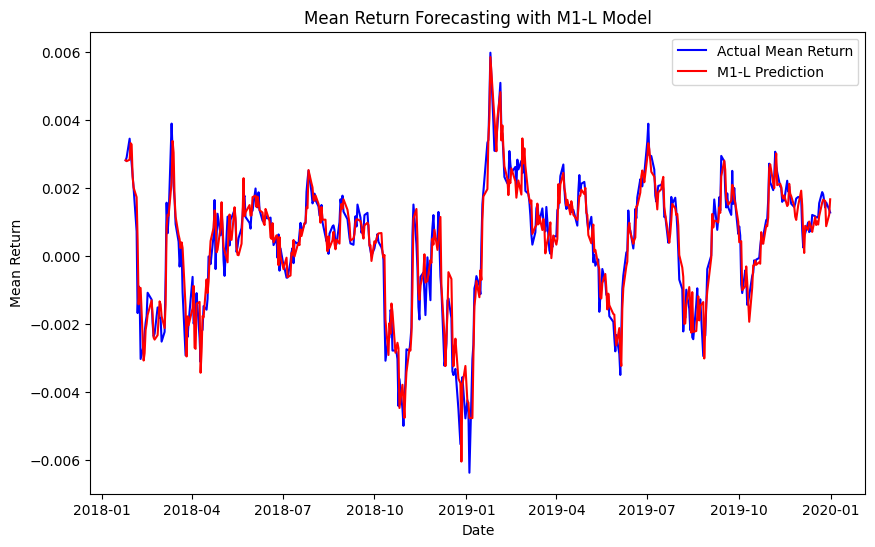

Mean Absolute Error (MAE): 0.0004207761840471692


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # S&P 500 Index ticker symbol
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbol and try again.")

# Calculate daily returns
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Step 2: Preprocess the data for M1-L model

# 2.1 Calculate the mean return (moment 1) using a rolling window
window_size = 20  # 20-day rolling window for mean return estimation
data['mean_return'] = data['return'].rolling(window=window_size).mean()

# Drop NaN values caused by the rolling window
data = data.dropna()

# 2.2 Scale the mean return for model input
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_mean_return = scaler.fit_transform(data['mean_return'].values.reshape(-1, 1))

# 2.3 Prepare the dataset for M1-L
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])  # Input features: Past mean returns
        y.append(data[i + time_step, 0])     # Output: Future mean return
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_mean_return)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 3: Build the M1-L model (Linear Regression)
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Step 4: Predict mean return using the M1-L model
m1l_pred = linear_model.predict(X_test)

# Inverse scaling to get original mean return values
m1l_pred = scaler.inverse_transform(m1l_pred.reshape(-1, 1))
actual_mean_return = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 5: Visualize Predictions
plt.figure(figsize=(10, 6))

# Plot actual vs predicted mean return for M1-L
plt.plot(data.index[-len(y_test):], actual_mean_return, label='Actual Mean Return', color='blue')
plt.plot(data.index[-len(m1l_pred):], m1l_pred, label='M1-L Prediction', color='red')

plt.legend()
plt.title('Mean Return Forecasting with M1-L Model')
plt.xlabel('Date')
plt.ylabel('Mean Return')
plt.show()

# Step 6: Evaluate Performance

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(actual_mean_return - m1l_pred))
print(f"Mean Absolute Error (MAE): {mae}")


[*********************100%***********************]  1 of 1 completed


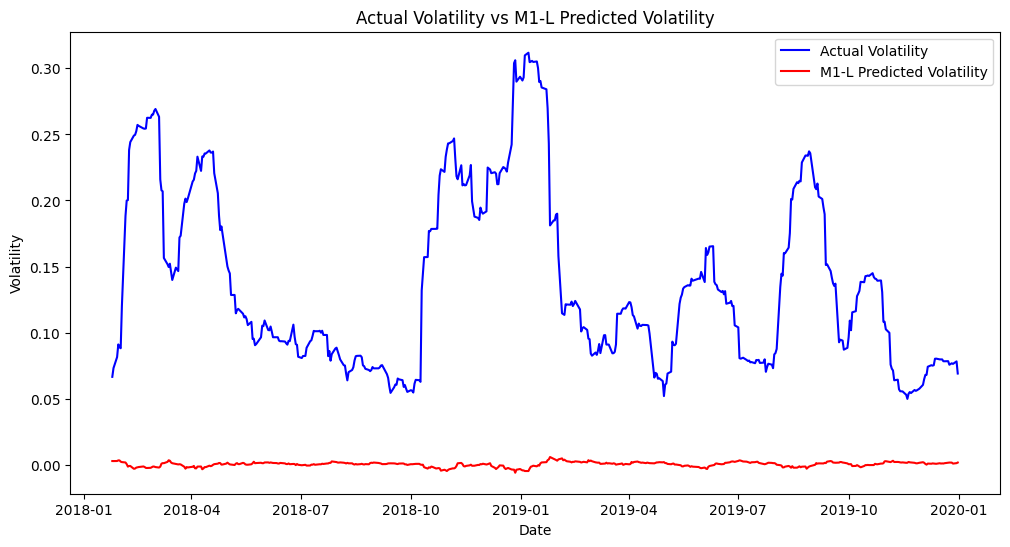

Mean Absolute Error (MAE): 0.0004207761840471692


In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # S&P 500 Index ticker symbol
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbol and try again.")

# Calculate daily returns
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Step 2: Preprocess the data for Actual Volatility and M1-L Volatility

# 2.1 Calculate historical volatility (actual volatility) using a rolling window
window_size = 20  # 20-day rolling window
data['actual_volatility'] = data['return'].rolling(window=window_size).std() * np.sqrt(252)  # Annualized volatility

# 2.2 Calculate the mean return (moment 1)
data['mean_return'] = data['return'].rolling(window=window_size).mean()

# Drop NaN values caused by the rolling window
data = data.dropna()

# 2.3 Scale the mean return for M1-L input
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_mean_return = scaler.fit_transform(data['mean_return'].values.reshape(-1, 1))

# Step 3: Prepare the dataset for M1-L Volatility
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])  # Input: Past mean returns
        y.append(data[i + time_step, 0])     # Output: Future mean return
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_mean_return)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Build the M1-L model (Linear Regression)
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict mean return volatility using the M1-L model
m1l_pred = linear_model.predict(X_test)

# Inverse scaling to get original mean return volatility values
m1l_pred = scaler.inverse_transform(m1l_pred.reshape(-1, 1))

# Inverse scaling for actual test data
actual_volatility = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 5: Visualize Actual Volatility vs. M1-L Predicted Volatility
plt.figure(figsize=(12, 6))

# Plot actual volatility
plt.plot(data.index[-len(actual_volatility):], data['actual_volatility'].iloc[-len(actual_volatility):], label='Actual Volatility', color='blue')

# Plot M1-L predicted volatility
plt.plot(data.index[-len(m1l_pred):], m1l_pred, label='M1-L Predicted Volatility', color='red')

plt.legend()
plt.title('Actual Volatility vs M1-L Predicted Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

# Step 6: Evaluate Performance

# Calculate Mean Absolute Error (MAE) for Volatility Prediction
mae = np.mean(np.abs(actual_volatility - m1l_pred))
print(f"Mean Absolute Error (MAE): {mae}")


M1L with SVR

[*********************100%***********************]  1 of 1 completed


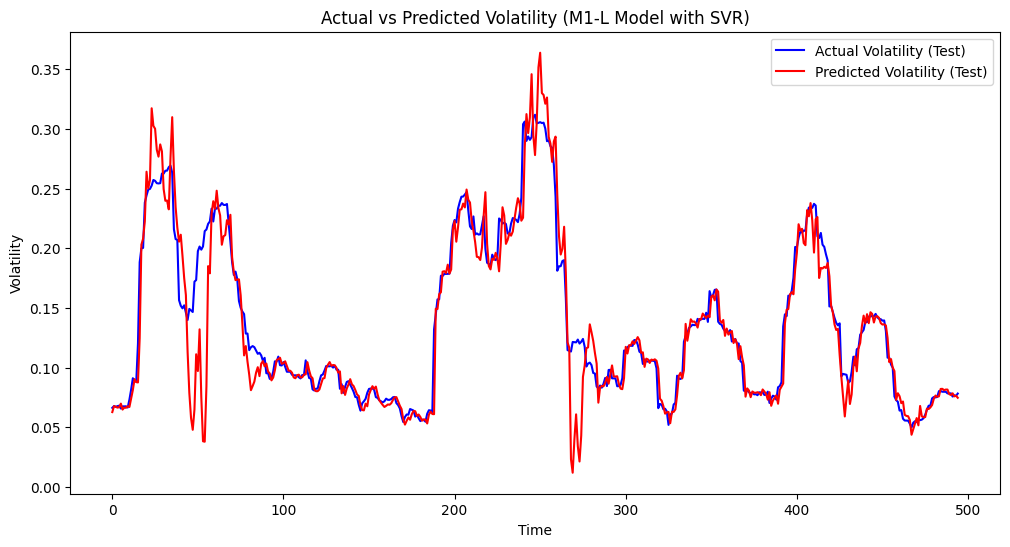

Mean Absolute Error (MAE): 0.013196294216051946
Root Mean Squared Error (RMSE): 0.025434651346764755


In [ ]:
# Install necessary libraries
# !pip install yfinance numpy pandas matplotlib scikit-learn

# Import libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # S&P 500 Index ticker symbol
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbol and try again.")

# Calculate daily returns
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Step 2: Calculate historical volatility
window_size = 20  # 20-day rolling window for volatility estimation
data['volatility'] = data['return'].rolling(window=window_size).std() * np.sqrt(252)  # Annualized volatility

# Drop NaN values caused by rolling window
data = data.dropna()

# Step 3: Prepare the dataset for M1-L model
X = data['volatility'].values

# Scale the data to [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X.reshape(-1, 1))

# Create lagged sequences (time series features)
def create_lagged_dataset(data, time_step=20):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])  # Use past `time_step` values
        y.append(data[i + time_step, 0])      # Predict next volatility
    return np.array(X), np.array(y)

time_step = 20  # Use past 20 days to predict the next day's volatility
X_lagged, y_lagged = create_lagged_dataset(X_scaled, time_step)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lagged, y_lagged, test_size=0.2, shuffle=False)

# Step 4: Build and train the M1-L model (using SVR)
svr_model = SVR(kernel='rbf', C=100, epsilon=0.01)
svr_model.fit(X_train, y_train)

# Step 5: Make predictions using the M1-L model
y_pred_train = svr_model.predict(X_train)
y_pred_test = svr_model.predict(X_test)

# Step 6: Inverse scale the predictions and actual values
y_pred_train_scaled = scaler.inverse_transform(y_pred_train.reshape(-1, 1)).flatten()
y_pred_test_scaled = scaler.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()
y_train_scaled = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Step 7: Visualize predictions vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_scaled)), y_test_scaled, label='Actual Volatility (Test)', color='blue')
plt.plot(range(len(y_pred_test_scaled)), y_pred_test_scaled, label='Predicted Volatility (Test)', color='red')
plt.title('Actual vs Predicted Volatility (M1-L Model with SVR)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Step 8: Evaluate the model
mae = mean_absolute_error(y_test_scaled, y_pred_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_test_scaled))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


[*********************100%***********************]  1 of 1 completed


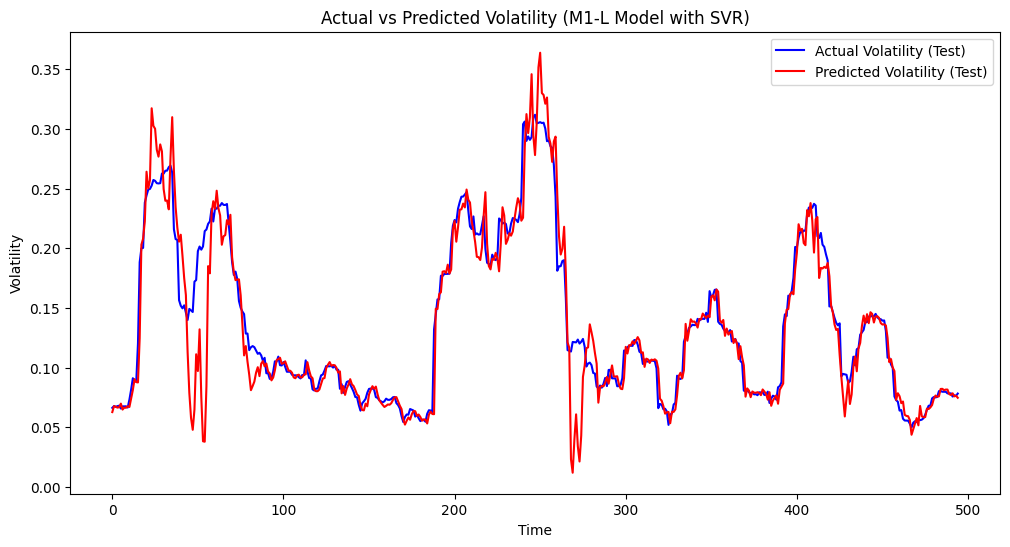

Mean Absolute Error (MAE): 0.013196294216051946
Root Mean Squared Error (RMSE): 0.025434651346764755
R-squared (R²): 0.8535297342260402


In [ ]:
# Install necessary libraries
# !pip install yfinance numpy pandas matplotlib scikit-learn

# Import libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # S&P 500 Index ticker symbol
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbol and try again.")

# Calculate daily returns
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Step 2: Calculate historical volatility
window_size = 20  # 20-day rolling window for volatility estimation
data['volatility'] = data['return'].rolling(window=window_size).std() * np.sqrt(252)  # Annualized volatility

# Drop NaN values caused by rolling window
data = data.dropna()

# Step 3: Prepare the dataset for M1-L model
X = data['volatility'].values

# Scale the data to [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X.reshape(-1, 1))

# Create lagged sequences (time series features)
def create_lagged_dataset(data, time_step=20):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])  # Use past `time_step` values
        y.append(data[i + time_step, 0])      # Predict next volatility
    return np.array(X), np.array(y)

time_step = 20  # Use past 20 days to predict the next day's volatility
X_lagged, y_lagged = create_lagged_dataset(X_scaled, time_step)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lagged, y_lagged, test_size=0.2, shuffle=False)

# Step 4: Build and train the M1-L model (using SVR)
svr_model = SVR(kernel='rbf', C=100, epsilon=0.01)
svr_model.fit(X_train, y_train)

# Step 5: Make predictions using the M1-L model
y_pred_train = svr_model.predict(X_train)
y_pred_test = svr_model.predict(X_test)

# Step 6: Inverse scale the predictions and actual values
y_pred_train_scaled = scaler.inverse_transform(y_pred_train.reshape(-1, 1)).flatten()
y_pred_test_scaled = scaler.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()
y_train_scaled = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Step 7: Visualize predictions vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_scaled)), y_test_scaled, label='Actual Volatility (Test)', color='blue')
plt.plot(range(len(y_pred_test_scaled)), y_pred_test_scaled, label='Predicted Volatility (Test)', color='red')
plt.title('Actual vs Predicted Volatility (M1-L Model with SVR)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Step 8: Evaluate the model
mae = mean_absolute_error(y_test_scaled, y_pred_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_test_scaled))
r2 = r2_score(y_test_scaled, y_pred_test_scaled)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


M1L with LSTM

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0214 - val_loss: 0.0057
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0033 - val_loss: 0.0028
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 9.2256e-04 - val_loss: 0.0012
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.5780e-04 - val_loss: 0.0012
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 9.5720e-04 - val_loss: 0.0010
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.5260e-04 - val_loss: 0.0010
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/s

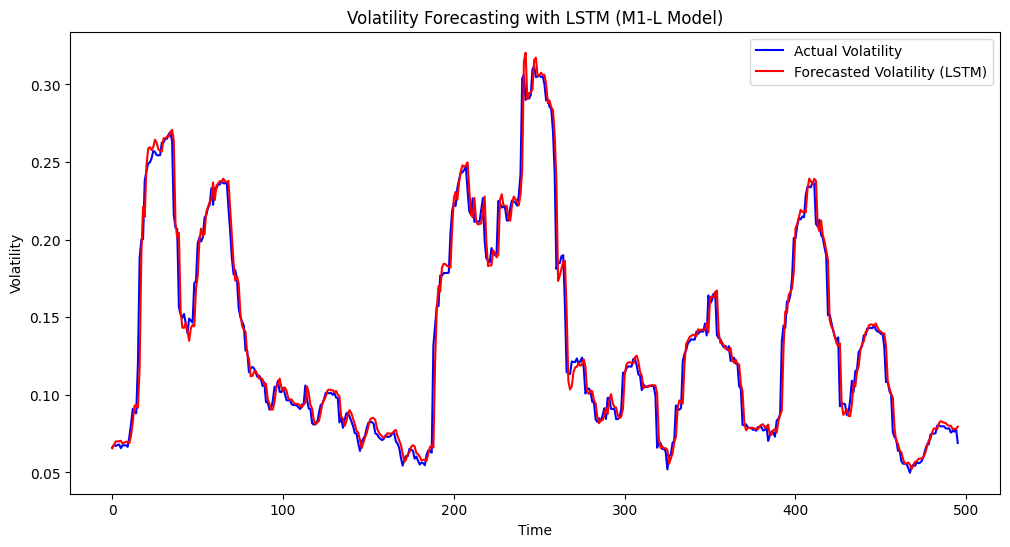

Mean Absolute Error (MAE): 0.0060077129335581415
Root Mean Squared Error (RMSE): 0.010666421386464684


In [ ]:
# Install required libraries
# !pip install yfinance numpy pandas matplotlib tensorflow scikit-learn

# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # S&P 500 Index ticker symbol
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbol and try again.")

# Calculate daily returns
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Step 2: Calculate historical volatility
window_size = 20  # 20-day rolling window for volatility estimation
data['volatility'] = data['return'].rolling(window=window_size).std() * np.sqrt(252)  # Annualized volatility

# Drop NaN values caused by rolling window
data = data.dropna()

# Step 3: Prepare the data for LSTM
# Extract volatility values and scale them to [0, 1]
volatility = data['volatility'].values
scaler = MinMaxScaler(feature_range=(0, 1))
volatility_scaled = scaler.fit_transform(volatility.reshape(-1, 1))

# Create sequences (time-steps) for LSTM
time_step = 20  # Use the past 20 days to predict the next day's volatility
X, y = [], []
for i in range(time_step, len(volatility_scaled)):
    X.append(volatility_scaled[i - time_step:i, 0])  # Past 20 days
    y.append(volatility_scaled[i, 0])  # Next day

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input for LSTM (samples, time-steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Step 4: Define the LSTM-based M1-L model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),  # First LSTM layer
    LSTM(50),  # Second LSTM layer
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the model
epochs = 50
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

# Step 6: Forecast using the trained model
y_pred_scaled = model.predict(X_test)

# Reverse scaling for predictions and actual values
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 7: Visualize the forecasted volatility vs. actual volatility
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_actual)), y_test_actual, label='Actual Volatility', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Forecasted Volatility (LSTM)', color='red')
plt.title('Volatility Forecasting with LSTM (M1-L Model)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Step 8: Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0173 - val_loss: 0.0050
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0034 - val_loss: 0.0028
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0011 - val_loss: 0.0027
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.6475e-04 - val_loss: 0.0011
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.4768e-04 - val_loss: 0.0011
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.0773e-

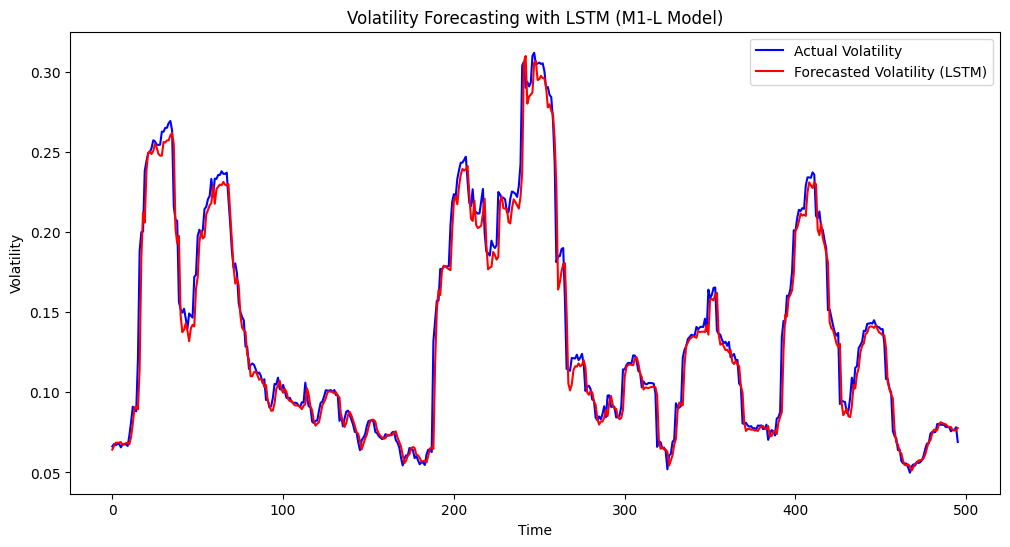

Mean Absolute Error (MAE): 0.0066390305151471695
Root Mean Squared Error (RMSE): 0.011011629621712284
R-squared (R²): 0.972546847977294


In [ ]:
# Install required libraries
# !pip install yfinance numpy pandas matplotlib tensorflow scikit-learn

# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # S&P 500 Index ticker symbol
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbol and try again.")

# Calculate daily returns
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Step 2: Calculate historical volatility
window_size = 20  # 20-day rolling window for volatility estimation
data['volatility'] = data['return'].rolling(window=window_size).std() * np.sqrt(252)  # Annualized volatility

# Drop NaN values caused by rolling window
data = data.dropna()

# Step 3: Prepare the data for LSTM
# Extract volatility values and scale them to [0, 1]
volatility = data['volatility'].values
scaler = MinMaxScaler(feature_range=(0, 1))
volatility_scaled = scaler.fit_transform(volatility.reshape(-1, 1))

# Create sequences (time-steps) for LSTM
time_step = 20  # Use the past 20 days to predict the next day's volatility
X, y = [], []
for i in range(time_step, len(volatility_scaled)):
    X.append(volatility_scaled[i - time_step:i, 0])  # Past 20 days
    y.append(volatility_scaled[i, 0])  # Next day

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input for LSTM (samples, time-steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Step 4: Define the LSTM-based M1-L model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),  # First LSTM layer
    LSTM(50),  # Second LSTM layer
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the model
epochs = 50
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

# Step 6: Forecast using the trained model
y_pred_scaled = model.predict(X_test)

# Reverse scaling for predictions and actual values
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 7: Visualize the forecasted volatility vs. actual volatility
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_actual)), y_test_actual, label='Actual Volatility', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Forecasted Volatility (LSTM)', color='red')
plt.title('Volatility Forecasting with LSTM (M1-L Model)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Step 8: Evaluate the model
mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


M1L with ARIMA

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


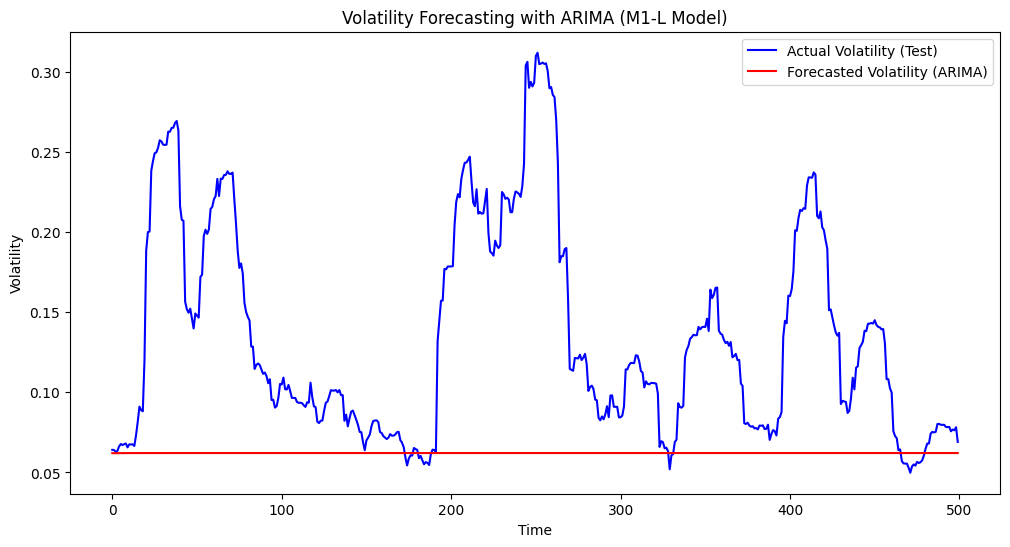

Mean Absolute Error (MAE): 0.07369561370417338
Root Mean Squared Error (RMSE): 0.09879465690467501


In [ ]:
# Install required libraries
# !pip install yfinance numpy pandas matplotlib statsmodels scikit-learn

# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # S&P 500 Index ticker symbol
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbol and try again.")

# Step 2: Calculate daily returns
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Step 3: Calculate historical volatility
window_size = 20  # 20-day rolling window for volatility estimation
data['volatility'] = data['return'].rolling(window=window_size).std() * np.sqrt(252)  # Annualized volatility

# Drop NaN values caused by rolling window
data = data.dropna().reset_index(drop=True)

# Step 4: Prepare the data for ARIMA modeling
volatility = data['volatility'].values  # Extract the volatility series
train_size = int(len(volatility) * 0.8)  # Use 80% for training, 20% for testing
train_data = volatility[:train_size]
test_data = volatility[train_size:]

# Step 5: Fit the ARIMA model
p, d, q = 2, 1, 2  # ARIMA hyperparameters (can be tuned using grid search or auto_arima)
arima_model = ARIMA(train_data, order=(p, d, q))  # Define the ARIMA model
arima_fitted = arima_model.fit()  # Fit the ARIMA model to the training data

# Step 6: Forecast using the ARIMA model
forecast_steps = len(test_data)
forecast = arima_fitted.forecast(steps=forecast_steps)

# Step 7: Visualize the forecasted volatility vs. actual volatility
plt.figure(figsize=(12, 6))
plt.plot(range(len(test_data)), test_data, label='Actual Volatility (Test)', color='blue')
plt.plot(range(len(forecast)), forecast, label='Forecasted Volatility (ARIMA)', color='red')
plt.title('Volatility Forecasting with ARIMA (M1-L Model)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Step 8: Evaluate the ARIMA model
mae = mean_absolute_error(test_data, forecast)
rmse = np.sqrt(mean_squared_error(test_data, forecast))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


[*********************100%***********************]  1 of 1 completed
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv8olf30o/a_j1ly29.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv8olf30o/rtr6u9vv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92998', 'data', 'file=/tmp/tmpv8olf30o/a_j1ly29.json', 'init=/tmp/tmpv8olf30o/rtr6u9vv.json', 'output', 'file=/tmp/tmpv8olf30o/prophet_modelgxrksnsi/prophet_model-20241209200010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:00:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:00:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1200x600 with 0 Axes>

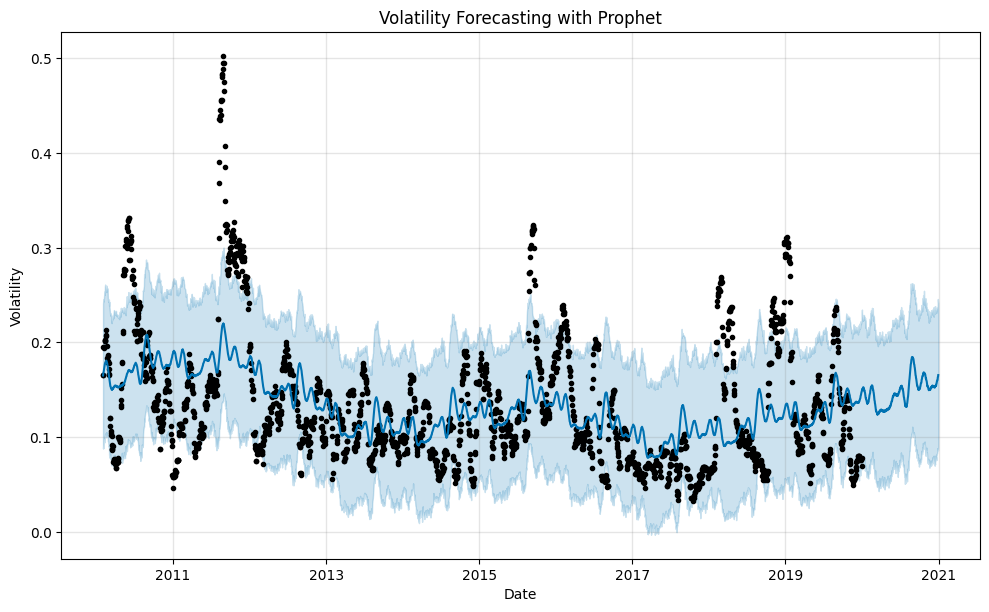

MergeError: Not allowed to merge between different levels. (1 levels on the left, 2 on the right)

In [ ]:
# Install required libraries
!pip install prophet

# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # S&P 500 Index ticker symbol
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbol and try again.")

# Step 2: Calculate daily returns
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Step 3: Calculate historical volatility
window_size = 20  # 20-day rolling window for volatility estimation
data['volatility'] = data['return'].rolling(window=window_size).std() * (252**0.5)  # Annualized volatility

# Drop NaN values caused by rolling window
data = data.dropna()

# Step 4: Prepare data for Prophet
# Prophet requires columns named 'ds' (date) and 'y' (value to forecast)
prophet_data = data[['volatility']].reset_index()
prophet_data.rename(columns={'Date': 'ds', 'volatility': 'y'}, inplace=True)

# Step 5: Train the Prophet model
model = Prophet(daily_seasonality=False, yearly_seasonality=True, weekly_seasonality=True)
model.fit(prophet_data)

# Step 6: Create a future dataframe
future = model.make_future_dataframe(periods=365)  # Forecast for the next year (365 days)

# Step 7: Forecast using Prophet
forecast = model.predict(future)

# Step 8: Visualize the forecast
plt.figure(figsize=(12, 6))
model.plot(forecast)
plt.title('Volatility Forecasting with Prophet')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

# Step 9: Evaluate the model on historical data
# Join the actual and predicted values
merged = forecast.set_index('ds')[['yhat']].join(prophet_data.set_index('ds'))
merged.dropna(inplace=True)  # Drop rows where actual values are NaN

# Calculate performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(merged['y'], merged['yhat'])
rmse = mean_squared_error(merged['y'], merged['yhat'], squared=False)
r2 = r2_score(merged['y'], merged['yhat'])

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


[*********************100%***********************]  1 of 1 completed
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv8olf30o/szn318rw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv8olf30o/2ce4le13.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61344', 'data', 'file=/tmp/tmpv8olf30o/szn318rw.json', 'init=/tmp/tmpv8olf30o/2ce4le13.json', 'output', 'file=/tmp/tmpv8olf30o/prophet_modelm4_s86kw/prophet_model-20241209200918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:09:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:09:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1200x600 with 0 Axes>

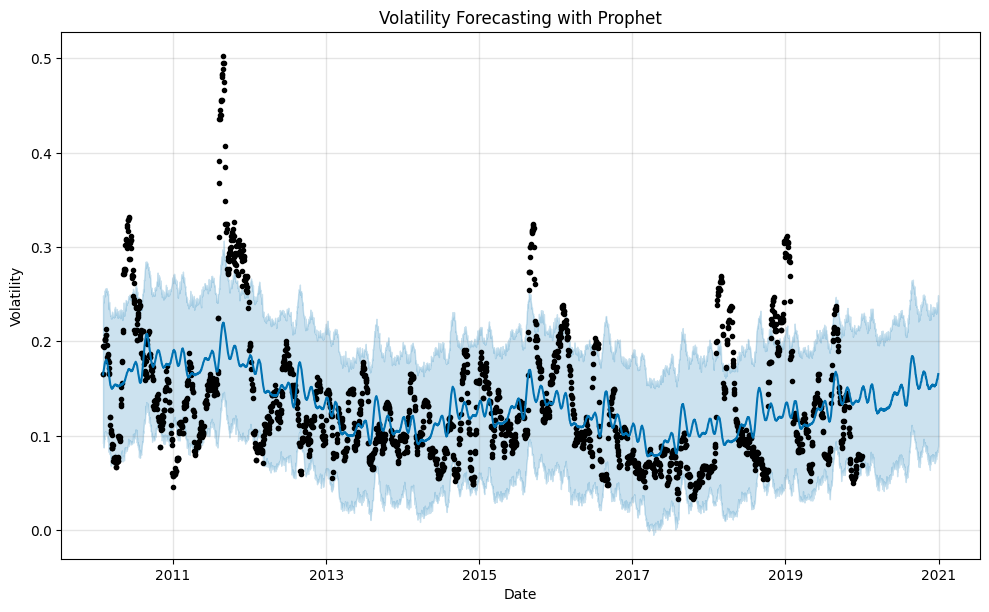

<ipython-input-5-f99b701ec438>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_indexed['ds'] = pd.to_datetime(forecast_indexed['ds'])


MergeError: Not allowed to merge between different levels. (1 levels on the left, 2 on the right)

In [ ]:
# Install required libraries
# !pip install yfinance pandas matplotlib prophet scikit-learn

# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # S&P 500 Index ticker symbol
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbol and try again.")

# Step 2: Calculate daily returns
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Step 3: Calculate historical volatility
window_size = 20  # 20-day rolling window for volatility estimation
data['volatility'] = data['return'].rolling(window=window_size).std() * (252**0.5)  # Annualized volatility

# Drop NaN values caused by rolling window
data = data.dropna()

# Step 4: Prepare data for Prophet
# Prophet requires columns named 'ds' (date) and 'y' (value to forecast)
prophet_data = data[['volatility']].reset_index()
prophet_data.rename(columns={'Date': 'ds', 'volatility': 'y'}, inplace=True)

# Ensure the 'ds' column is in datetime format
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'])

# Step 5: Train the Prophet model
model = Prophet(daily_seasonality=False, yearly_seasonality=True, weekly_seasonality=True)
model.fit(prophet_data)

# Step 6: Create a future dataframe
future = model.make_future_dataframe(periods=365)  # Forecast for the next year (365 days)

# Step 7: Forecast using Prophet
forecast = model.predict(future)

# Step 8: Visualize the forecast
plt.figure(figsize=(12, 6))
model.plot(forecast)
plt.title('Volatility Forecasting with Prophet')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

# Step 9: Evaluate the model on historical data
# Ensure both dataframes have 'ds' as a flat column and the same datetime type
forecast_indexed = forecast[['ds', 'yhat']]
prophet_data_indexed = prophet_data[['ds', 'y']]

# Ensure both 'ds' columns are of the same type
forecast_indexed['ds'] = pd.to_datetime(forecast_indexed['ds'])
prophet_data_indexed['ds'] = pd.to_datetime(prophet_data_indexed['ds'])

# Merge the actual and predicted values on the 'ds' column
merged = pd.merge(forecast_indexed, prophet_data_indexed, on='ds', how='inner')

# Drop rows with NaN values
merged.dropna(inplace=True)

# Step 10: Calculate performance metrics
mae = mean_absolute_error(merged['y'], merged['yhat'])
rmse = mean_squared_error(merged['y'], merged['yhat'], squared=False)
r2 = r2_score(merged['y'], merged['yhat'])

# Display metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Step 11: Visualize actual vs predicted volatility on historical data
plt.figure(figsize=(12, 6))
plt.plot(merged['ds'], merged['y'], label='Actual Volatility', color='blue')
plt.plot(merged['ds'], merged['yhat'], label='Predicted Volatility (Prophet)', color='red')
plt.title('Actual vs Predicted Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


In [ ]:
# Install necessary libraries
# !pip install yfinance pandas matplotlib momentfm torch

# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from momentfm import MOMENTPipeline, ForecastingConfig

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # S&P 500 Index ticker symbol
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbol and try again.")

# Step 2: Calculate daily returns
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Step 3: Calculate historical volatility
window_size = 20  # 20-day rolling window for volatility estimation
data['volatility'] = data['return'].rolling(window=window_size).std() * np.sqrt(252)  # Annualized volatility

# Drop NaN values caused by rolling window
data = data.dropna()

# Step 4: Prepare the data for MOMENT
# MOMENT requires a 'ds' (timestamp) and 'y' (target) column
moment_data = data[['volatility']].reset_index()
moment_data.rename(columns={'Date': 'ds', 'volatility': 'y'}, inplace=True)

# Step 5: Split the data into train and test sets
train_size = int(len(moment_data) * 0.8)
train_data = moment_data.iloc[:train_size]
test_data = moment_data.iloc[train_size:]

# Convert train and test data to MOMENT-compatible format
train_ds = train_data['ds'].tolist()
train_y = train_data['y'].tolist()

test_ds = test_data['ds'].tolist()
test_y = test_data['y'].tolist()

# Step 6: Define the Configuration for MOMENTPipeline
config = ForecastingConfig(
    input_size=20,           # Use 20 past time steps for the input
    forecast_horizon=1,      # Predict 1 step ahead
    frequency="D",           # Daily frequency
    target_name="volatility" # Name of the target variable
)

# Step 7: Initialize the MOMENT pipeline
pipeline = MOMENTPipeline(config=config)

# Step 8: Train the MOMENT model
pipeline.fit(train_ds, train_y)

# Step 9: Predict using the MOMENT model
forecast = pipeline.predict(test_ds)

# Step 10: Evaluate the MOMENT model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(test_y, forecast)
rmse = np.sqrt(mean_squared_error(test_y, forecast))
r2 = r2_score(test_y, forecast)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Step 11: Visualize actual vs forecasted volatility
plt.figure(figsize=(12, 6))
plt.plot(test_ds, test_y, label='Actual Volatility', color='blue')
plt.plot(test_ds, forecast, label='Forecasted Volatility (MOMENT)', color='red')
plt.title('Actual vs Forecasted Volatility with MOMENT')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


ImportError: cannot import name 'ForecastingConfig' from 'momentfm' (/usr/local/lib/python3.10/dist-packages/momentfm/__init__.py)

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0206 - val_loss: 0.0045
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.6786e-04 - val_loss: 0.0012
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.9587e-04 - val_loss: 0.0011
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.8528e-04 - val_loss: 0.0011
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


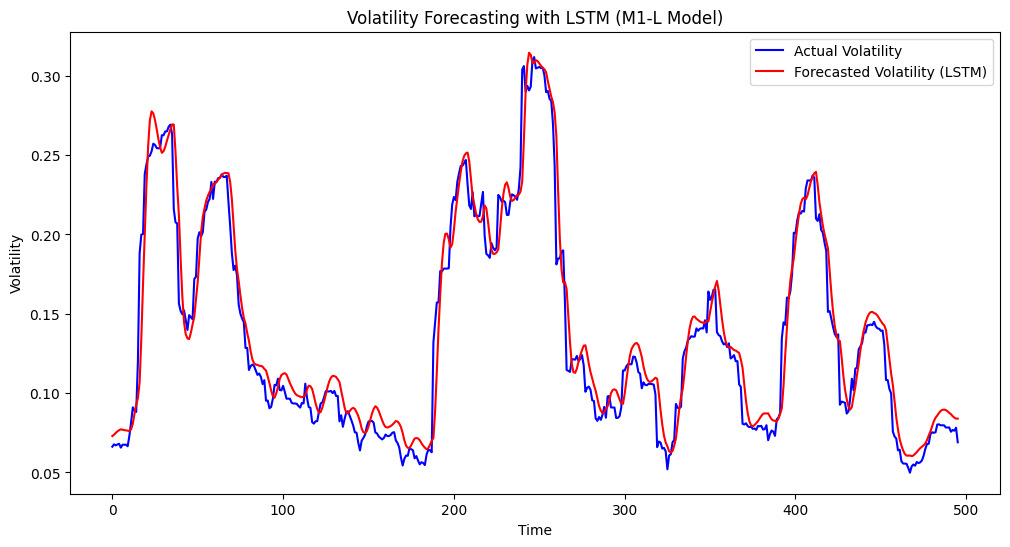

Mean Absolute Error (MAE): 0.011259589138824662
Root Mean Squared Error (RMSE): 0.015892100077009762
R-squared (R²): 0.9428190183565802


In [ ]:
# Install necessary libraries
# !pip install yfinance pandas matplotlib tensorflow scikit-learn

# Import required libraries
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # S&P 500 Index ticker symbol
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbol and try again.")

# Step 2: Calculate daily returns
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Step 3: Calculate historical volatility
window_size = 20  # 20-day rolling window for volatility estimation
data['volatility'] = data['return'].rolling(window=window_size).std() * np.sqrt(252)  # Annualized volatility

# Drop NaN values caused by rolling window
data = data.dropna()

# Step 4: Prepare the data for LSTM
# Extract volatility values and scale them to [0, 1]
volatility = data['volatility'].values
scaler = MinMaxScaler(feature_range=(0, 1))
volatility_scaled = scaler.fit_transform(volatility.reshape(-1, 1))

# Create sequences (time-steps) for LSTM
time_step = 20  # Use the past 20 days to predict the next day's volatility
X, y = [], []
for i in range(time_step, len(volatility_scaled)):
    X.append(volatility_scaled[i - time_step:i, 0])  # Past 20 days
    y.append(volatility_scaled[i, 0])  # Next day

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input for LSTM (samples, time-steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Step 5: Define the LSTM-based M1-L model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),  # First LSTM layer
    LSTM(50),  # Second LSTM layer
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train the model
epochs = 10
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

# Step 7: Forecast using the trained model
y_pred_scaled = model.predict(X_test)

# Reverse scaling for predictions and actual values
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 8: Visualize the forecasted volatility vs. actual volatility
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_actual)), y_test_actual, label='Actual Volatility', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Forecasted Volatility (LSTM)', color='red')
plt.title('Volatility Forecasting with LSTM (M1-L Model)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Step 9: Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.0112 - val_loss: 0.0079
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0085 - val_loss: 0.0079
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075 - val_loss: 0.0080
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0083 - val_loss: 0.0078
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0095 - val_loss: 0.0081
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0073 - val_loss: 0.0081
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0072 - val_loss: 0.0079
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0062 - val_loss: 0.0080
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - val_loss: 0.0078
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0076 - val_loss: 0.0081
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


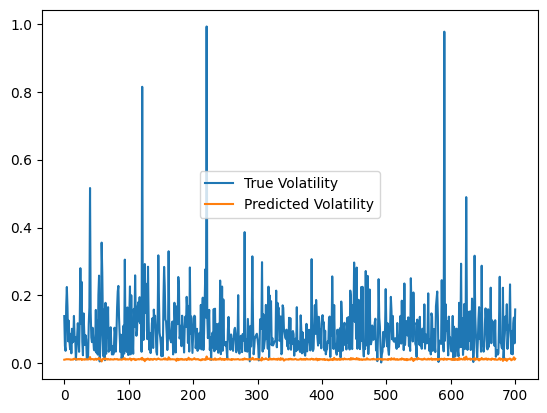

In [ ]:
## M1L using LSTM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Prepare Data
ticker = "^GSPC"
data = yf.download(ticker, start="2010-01-01", end="2024-01-01")
data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1)).dropna()
data['Volatility'] = data['Log_Returns'].rolling(window=10).std().shift(-1).dropna()
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Log_Returns', 'Volatility']].dropna())

# Create sequences
X = []
y = []
sequence_length = 10
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i + sequence_length, 0])
    y.append(scaled_data[i + sequence_length, 1])
X = np.array(X)
y = np.array(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 3: Forecast
forecast_vol = model.predict(X_test)
forecast_vol = scaler.inverse_transform([[0, fv] for fv in forecast_vol.flatten()])[:, 1]

# Plot results
plt.plot(range(len(y_test)), y_test, label='True Volatility')
plt.plot(range(len(forecast_vol)), forecast_vol, label='Predicted Volatility')
plt.legend()
plt.show()


In [ ]:
! pip install git+https://github.com/moment-timeseries-foundation-model/moment.git

  Cloning https://github.com/moment-timeseries-foundation-model/moment.git to /tmp/pip-req-build-22exk4uy
  Running command git clone --filter=blob:none --quiet https://github.com/moment-timeseries-foundation-model/moment.git /tmp/pip-req-build-22exk4uy
  Resolved https://github.com/moment-timeseries-foundation-model/moment.git to commit fb620934ef6b67f878bc21b8640b22d117dbffa6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.0/419.0 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 34.1 MB/s eta 0:00:00
  Created wheel for momentfm: filename=momentfm-0.1.2-py3-none-any.whl size=33793 sha256

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/momentfm/models/moment.py:174: UserWarning: Only reconstruction head is pre-trained. Classification and forecasting heads must be fine-tuned.
  warnings.warn("Only reconstruction head is pre-trained. Classification and forecasting heads must be fine-tuned.")
Epoch 1/1:   0%|          | 0/138 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have re

Epoch 1: Train Loss = 0.0091


Evaluating: 100%|██████████| 6/6 [00:01<00:00,  4.69it/s]


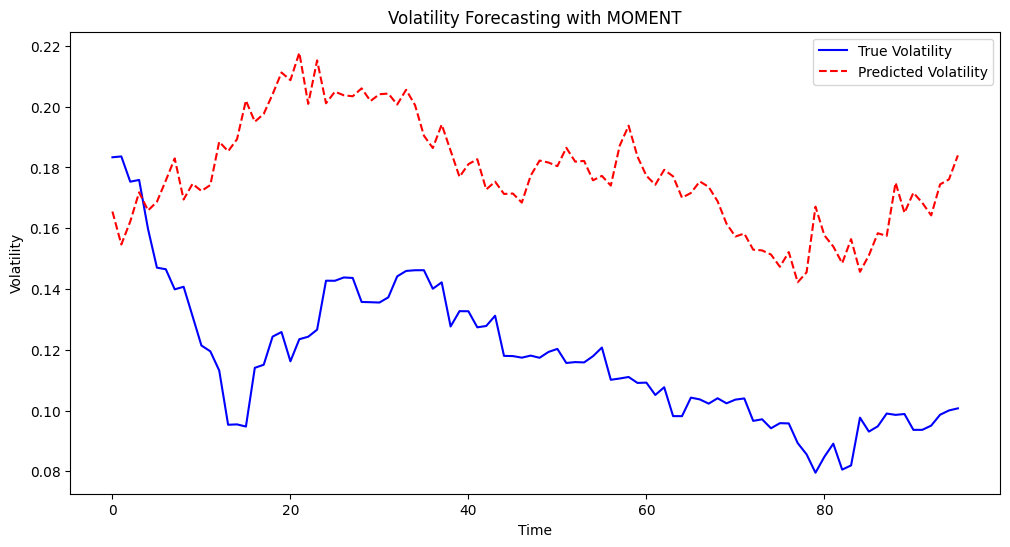

MAE: 0.0417
RMSE: 0.0477


In [ ]:
# Install necessary libraries
# !pip install numpy pandas matplotlib torch tqdm yfinance sklearn
# !pip install git+https://github.com/moment-timeseries-foundation-model/moment.git

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, Dataset
from momentfm import MOMENTPipeline
from tqdm import tqdm

# Step 1: Download the data
import yfinance as yf

ticker = "^GSPC"
data = yf.download(ticker, start="2010-01-01", end="2024-01-01")

# Step 2: Calculate daily returns and volatility
data['Daily_Return'] = data['Close'].pct_change()
data = data.dropna()  # Drop NaN values
window_size = 20  # Rolling window size for volatility
data['Volatility'] = data['Daily_Return'].rolling(window=window_size).std() * np.sqrt(252)  # Annualized volatility
data = data.dropna()  # Drop NaN values created by rolling

# Normalize the volatility data
# Normalize the volatility data using a clear, distinct name
data_scaler = MinMaxScaler()
data['Volatility_Scaled'] = data_scaler.fit_transform(data[['Volatility']])

# Prepare time series for forecasting
class VolatilityDataset(Dataset):
    def __init__(self, data, forecast_horizon, context_length):
        self.data = data
        self.forecast_horizon = forecast_horizon
        self.context_length = context_length

    def __len__(self):
        return len(self.data) - self.forecast_horizon - self.context_length

    def __getitem__(self, idx):
        start_idx = idx
        end_idx = idx + self.context_length
        forecast_start_idx = end_idx
        forecast_end_idx = end_idx + self.forecast_horizon

        context = self.data[start_idx:end_idx]
        forecast = self.data[forecast_start_idx:forecast_end_idx]

        return torch.tensor(context, dtype=torch.float32), torch.tensor(forecast, dtype=torch.float32)

# Use distinct variable names for the scaler objects
forecast_horizon = 96
context_length = 512
volatility_values = data['Volatility_Scaled'].values

train_split = int(len(volatility_values) * 0.8)
train_data = volatility_values[:train_split]
test_data = volatility_values[train_split:]

train_dataset = VolatilityDataset(train_data, forecast_horizon, context_length)
test_dataset = VolatilityDataset(test_data, forecast_horizon, context_length)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# MOMENT Model and training setup
model = MOMENTPipeline.from_pretrained(
    "AutonLab/MOMENT-1-large",
    model_kwargs={
        'task_name': 'forecasting',
        'forecast_horizon': forecast_horizon,
        'head_dropout': 0.1,
        'weight_decay': 0,
        'freeze_encoder': True,
        'freeze_embedder': True,
        'freeze_head': False,
    },
)
model.init()

# Training
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

num_epochs = 1
grad_scaler = torch.amp.GradScaler()  # Rename this scaler for clarity

# Fix input and output shape mismatch during training
for epoch in range(num_epochs):
    model.train()
    train_losses = []
    for context, forecast in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", total=len(train_loader)):
        context = context.unsqueeze(1).to(device)  # Reshape context to [batch_size, n_channels, sequence_length]
        forecast = forecast.unsqueeze(1).to(device)  # Reshape forecast to match output [batch_size, 1, forecast_horizon]

        optimizer.zero_grad()
        with torch.amp.autocast(device_type="cuda"):
            output = model(x_enc=context)
            loss = criterion(output.forecast, forecast)  # Compute loss after ensuring matching shapes
        grad_scaler.scale(loss).backward()
        grad_scaler.step(optimizer)
        grad_scaler.update()

        train_losses.append(loss.item())

    print(f"Epoch {epoch+1}: Train Loss = {np.mean(train_losses):.4f}")

# Evaluate the model and ensure predictions and targets are correctly reshaped
model.eval()
preds, trues = [], []
with torch.no_grad():
    for context, forecast in tqdm(test_loader, desc="Evaluating", total=len(test_loader)):
        context = context.unsqueeze(1).to(device)
        forecast = forecast.unsqueeze(1).to(device)
        output = model(x_enc=context)
        preds.append(output.forecast.cpu().numpy())
        trues.append(forecast.cpu().numpy())

preds = np.concatenate(preds, axis=0)  # Shape: (num_batches * batch_size, 1, forecast_horizon)
trues = np.concatenate(trues, axis=0)  # Shape: (num_batches * batch_size, 1, forecast_horizon)

# Fix reverse scaling
preds_flattened = preds.squeeze(1).reshape(-1, 1)  # Flatten predictions for inverse scaling
trues_flattened = trues.squeeze(1).reshape(-1, 1)  # Flatten true values for inverse scaling

preds_unscaled = data_scaler.inverse_transform(preds_flattened).reshape(preds.shape[0], -1)
trues_unscaled = data_scaler.inverse_transform(trues_flattened).reshape(trues.shape[0], -1)

# Corrected Plot
plt.figure(figsize=(12, 6))
plt.plot(trues_unscaled[0], label='True Volatility', color='blue')
plt.plot(preds_unscaled[0], label='Predicted Volatility', color='red', linestyle='--')
plt.title('Volatility Forecasting with MOMENT')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()  # Ensure only one legend is created
plt.show()

# Metrics
mae = mean_absolute_error(trues_unscaled.flatten(), preds_unscaled.flatten())
rmse = np.sqrt(mean_squared_error(trues_unscaled.flatten(), preds_unscaled.flatten()))
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


In [ ]:
# Install necessary libraries
# ! pip install momentfm
# !pip install numpy pandas matplotlib torch tqdm yfinance sklearn
# !pip install git+https://github.com/moment-timeseries-foundation-model/moment.git

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, Dataset
from momentfm import MOMENTPipeline
from tqdm import tqdm

# Step 1: Download the data
import yfinance as yf

ticker = "^GSPC"
data = yf.download(ticker, start="2010-01-01", end="2024-01-01")

# Step 2: Calculate daily returns and volatility
data['Daily_Return'] = data['Close'].pct_change()
data = data.dropna()  # Drop NaN values
window_size = 20  # Rolling window size for volatility
data['Volatility'] = data['Daily_Return'].rolling(window=window_size).std() * np.sqrt(252)  # Annualized volatility
data = data.dropna()  # Drop NaN values created by rolling

# Normalize the volatility data
# Normalize the volatility data using a clear, distinct name
data_scaler = MinMaxScaler()
data['Volatility_Scaled'] = data_scaler.fit_transform(data[['Volatility']])

# Prepare time series for forecasting
class VolatilityDataset(Dataset):
    def __init__(self, data, forecast_horizon, context_length):
        self.data = data
        self.forecast_horizon = forecast_horizon
        self.context_length = context_length

    def __len__(self):
        return len(self.data) - self.forecast_horizon - self.context_length

    def __getitem__(self, idx):
        start_idx = idx
        end_idx = idx + self.context_length
        forecast_start_idx = end_idx
        forecast_end_idx = end_idx + self.forecast_horizon

        context = self.data[start_idx:end_idx]
        forecast = self.data[forecast_start_idx:forecast_end_idx]

        return torch.tensor(context, dtype=torch.float32), torch.tensor(forecast, dtype=torch.float32)

# Use distinct variable names for the scaler objects
forecast_horizon = 96
context_length = 512
volatility_values = data['Volatility_Scaled'].values

train_split = int(len(volatility_values) * 0.8)
train_data = volatility_values[:train_split]
test_data = volatility_values[train_split:]

train_dataset = VolatilityDataset(train_data, forecast_horizon, context_length)
test_dataset = VolatilityDataset(test_data, forecast_horizon, context_length)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
# Updated hyperparameters
forecast_horizon = 96
context_length = 1024  # Larger context for better pattern recognition
learning_rate = 1e-5  # Smaller learning rate for stable training
num_epochs = 5  # More epochs for better fine-tuning
weight_decay = 1e-5
dropout = 0.2

# Adjusted Model
model = MOMENTPipeline.from_pretrained(
    "AutonLab/MOMENT-1-large",
    model_kwargs={
        'task_name': 'forecasting',
        'forecast_horizon': forecast_horizon,
        'head_dropout': dropout,  # Increase dropout for regularization
        'weight_decay': weight_decay,  # Apply weight decay
        'freeze_encoder': True,
        'freeze_embedder': True,
        'freeze_head': False,
    },
)
model.init()

# Optimizer with updated learning rate and weight decay
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Training loop
# Debugging the shape of context
for epoch in range(num_epochs):
    model.train()
    train_losses = []
    for context, forecast in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", total=len(train_loader)):
        # Ensure context has the correct shape
        print(f"Original context shape: {context.shape}")  # Debugging

        context = context.unsqueeze(1).to(device)  # Add n_channels dimension
        forecast = forecast.unsqueeze(1).to(device)  # Reshape forecast to match output

        print(f"Modified context shape: {context.shape}")  # Debugging
        print(f"Forecast shape: {forecast.shape}")  # Debugging

        optimizer.zero_grad()
        with torch.amp.autocast(device_type="cuda"):
            output = model(x_enc=context)  # Ensure input matches expected shape
            print(f"Model output shape: {output.forecast.shape}")  # Debugging
            loss = criterion(output.forecast, forecast)  # Compute loss

        grad_scaler.scale(loss).backward()
        grad_scaler.step(optimizer)
        grad_scaler.update()

        train_losses.append(loss.item())

    print(f"Epoch {epoch+1}: Train Loss = {np.mean(train_losses):.4f}")


# Evaluate
model.eval()
preds, trues = [], []
with torch.no_grad():
    for context, forecast in tqdm(test_loader, desc="Evaluating", total=len(test_loader)):
        context = context.unsqueeze(1).to(device)
        forecast = forecast.unsqueeze(1).to(device)
        output = model(x_enc=context)
        preds.append(output.forecast.cpu().numpy())
        trues.append(forecast.cpu().numpy())

preds = np.concatenate(preds, axis=0)
trues = np.concatenate(trues, axis=0)

# Reverse scaling
preds_flattened = preds.squeeze(1).reshape(-1, 1)
trues_flattened = trues.squeeze(1).reshape(-1, 1)

preds_unscaled = data_scaler.inverse_transform(preds_flattened).reshape(preds.shape[0], -1)
trues_unscaled = data_scaler.inverse_transform(trues_flattened).reshape(trues.shape[0], -1)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(trues_unscaled[0], label='True Volatility', color='blue')
plt.plot(preds_unscaled[0], label='Predicted Volatility', color='red', linestyle='--')
plt.title('Improved Volatility Forecasting with MOMENT')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Metrics
mae = mean_absolute_error(trues_unscaled.flatten(), preds_unscaled.flatten())
rmse = np.sqrt(mean_squared_error(trues_unscaled.flatten(), preds_unscaled.flatten()))
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


RuntimeError: Failed to import transformers.models.t5.modeling_t5 because of the following error (look up to see its traceback):
Failed to import transformers.generation.utils because of the following error (look up to see its traceback):
cannot import name 'split_torch_state_dict_into_shards' from 'huggingface_hub' (/usr/local/lib/python3.10/dist-packages/huggingface_hub/__init__.py)